<a href="https://colab.research.google.com/github/talathkhaleel1/learning/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Soil Moisture, which indicates the amount of water in the soil, is one of the most important crop irrigation parameters. In terms of water usage optimization and crop yield, estimating future soil moisture is an essentially valuable for crop irrigation. As a result, farmers can base crop irrigation decisions on this parameter. Sensors can be used to estimate this value in real time, which may assist farmers in deciding whether or not to irrigate the land. The soil moisture value provided by the sensors, on the other hand, is instantaneous and cannot be used to directly decide the best timing of irrigation or the water quantity required to irrigate.

The soil moisture value can, in fact, vary greatly depending on multiple factors such as humidity, weather conditions, temperature and even the duration of the day. Using machine learning methods, these parameters can be used to predict soil moisture levels in the near future. Also this may help to develop an automated water irrigation management system that uses a variety of technologies and tools to aid farmers’ decision-making and automate the water management process.

The massive amounts of data that are frequently generated and saved via devices must be efficiently analyzed to help as a decision support mechanism. Machine learning methods such as Artificial Neural Networks (ANN), Recurrent Neural Networks(RNN) and Convolutional Neural Networks(CNN) can be used for this purpose and to allow for automation techniques in the agricultural domain.

The following project is a predictive analysis report of moisture level adopting RNN method of Long-Short Term Memory (LSTM) to build a model to forecast soil moisture values as a potential solution. This forecast is based on the data shared by the university on soil and weather conditions and variables in the German city of Munster. Data for 20 years (from 1 January 1991 - 31 December 2021) has been shared. We are following the steps stated below in building this model:

- We would begin by reading data and exploring the same. We shall look into some basic and statistical descriptives of the data as well.
- We then proceed to pre-process data and make it compatible in accordance with the objective of the project.
- Once data is pre-processed we would prepare the data my managing the trends and seasonality in data. Post this, we would divide data into training dataset, validation dataset and test dataset. We would also standardise data so that it is on a uniform scale of measurement, thus making things simpler.
- Once all the above steps are done we proceed building the model. We shall look into one classical machine learning model of ARIMA succeeded by neural network models of RNN(SimpleRNN) and model will ultimately be built and executed on LSTM method of RNN.


# 1. Getting and comprehending data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=173tvWt-qPyAqZJc1KoBiUHgoSg6nLUtT" -O "soil_and_weather_of_munster"

--2022-05-18 17:02:39--  https://drive.google.com/uc?export=download&id=173tvWt-qPyAqZJc1KoBiUHgoSg6nLUtT
Resolving drive.google.com (drive.google.com)... 142.251.8.102, 142.251.8.138, 142.251.8.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0f5fi4t3qlua37jk39r1nqjpqnjl928u/1652893350000/11121686744502963554/*/173tvWt-qPyAqZJc1KoBiUHgoSg6nLUtT?e=download [following]
--2022-05-18 17:02:40--  https://doc-0s-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0f5fi4t3qlua37jk39r1nqjpqnjl928u/1652893350000/11121686744502963554/*/173tvWt-qPyAqZJc1KoBiUHgoSg6nLUtT?e=download
Resolving doc-0s-3c-docs.googleusercontent.com (doc-0s-3c-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to doc-0s-3c-docs.googleusercontent.com (doc-0s-3c-docs.goo

**Importing required libraries**


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import tensorflow as tf

**Reading the file and having a glimpse of data**

Read and save database in a variable for further use. We will read the file using the pandas `pd.read_csv` format. This will help have large amount of data in consise and tabular format. The pandas library will convert tabular data into a dataframe which facilitates usage as we progress.







In [ ]:
soil_weather_df = pd.read_csv("soil_and_weather_of_munster")

2. Make a deep copy of this original dataframe and save it as backup(just in case)
`df_name = original_df.copy(deep = True)`
The copy is made for a just in case use - in case we mess up with original data. A deep copy of the same is made so that we have a new object created which is exactlty the same as original. Also any modifications to the copy will not modify data in the original dataset.

df: abbrevation is used to indicate dataframe throughout the project.


In [ ]:
soil_weather_df_backup = soil_weather_df.copy(deep = True)

2. Glancing through the data

  We need to have a look at the contents of the data. General visibility of data helps in better comprehension of the data, its basic contents such as indexes (row labels) and features (column names). This also gives us a feel on contents of data and is also a pre-requisite for exploratory data analysis (EDA).

In [ ]:
soil_weather_df

,DATUM,STATIONS_ID,QN_4,TT_TER,RF_TER,VGSL,TS05,BF10
0,1991-01-01 07:00:00,1766,10,3.0,91.0,0.3,2.9,102
1,1991-01-01 14:00:00,1766,10,4.8,85.0,0.3,2.9,102
2,1991-01-01 21:00:00,1766,10,3.9,82.0,0.3,2.9,102
3,1991-01-02 07:00:00,1766,10,5.6,94.0,1.4,6.3,110
4,1991-01-02 14:00:00,1766,10,11.0,87.0,1.4,6.3,110
...,...,...,...,...,...,...,...,...
35667,2021-12-30 00:00:00,1766,1,11.6,90.0,0.8,9.4,104
35668,2021-12-30 06:00:00,1766,1,11.1,98.0,0.8,9.4,104
35669,2021-12-30 12:00:00,1766,1,14.3,83.0,0.8,9.4,104
35670,2021-12-30 18:00:00,1766,1,13.5,90.0,0.8,9.4,104


# Exploratory Data Analysis (EDA)

###**Exploring data**

Exploring data facilitates understanding of the structure of the dataset, the variables - its values, indexes, the relationships between the variables and many more revelations of the data.

Statistical approach is adopted in most cases to conduct an EDA. This helps in arriving at meaningful conclusions about the data with databack up as proof.

As we proceed we shall see some exploratory data analysis (EDA) tools.

(Ref:https://www.datacamp.com/community/tutorials/python-data-profiling?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1007633&gclid=CjwKCAjwur-SBhB6EiwA5sKtjjI6c4o8kYtFnRM-Mz03cRKDtjNYMuVlP8eQYtF0-WxpIc3DGKFxVhoC1SIQAvD_BwE)

###**1. Data profiling**

Here one should try to understand what is the data is related to, for example, students academic records, climate change related issues, recorded temperatures over a time span, etc. One may also inspect the source, in case of legal concerns or declarations or to know the authenticity of the data.

To summarise, under data profiling, one gets the feel of what the data is all about. By data profiling we can conclude if the dataset is sufficient to help attain the objective of the business model we are expected to prepare. Any additional information can be obtained and appended if required.

Example: In this dataset, a time series data is provided and the objective is also to forcast a value 30 days in advance. **Time-series data : forecast of a value 30 days in advance** seems logical.

Also the background information shared provides us certain details in explicit form and enables better comprehension of the dataset.

###**2. Checking DataTypes**

In order to understand the composition of our dataset it is important we inspect the datatypes available in the data. Which of the features are integers, strings/objects, float, datetime, etc.
We can do so by using `df.dtypes` or `df.info()`. These in-built function returns the label name and their corresponding datatypes - just as shown below. However, the later function gives a more comprehensive outcome.
Viewing this helps us to the next step of data cleaning  and preparation for further progression.

In [ ]:
soil_weather_df.dtypes

DATUM           object
STATIONS_ID      int64
QN_4             int64
TT_TER         float64
RF_TER         float64
VGSL           float64
TS05           float64
BF10             int64
dtype: object

In [ ]:
soil_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35672 entries, 0 to 35671
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATUM        35672 non-null  object 
 1   STATIONS_ID  35672 non-null  int64  
 2   QN_4         35672 non-null  int64  
 3   TT_TER       35672 non-null  float64
 4   RF_TER       35672 non-null  float64
 5   VGSL         35672 non-null  float64
 6   TS05         35672 non-null  float64
 7   BF10         35672 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.2+ MB


###**3.Checking basic descriptives**

- **Length** : One needs to check general data descriptives such as length of the samples or observations and that of the features. To know this we can use `.shape` . The first value returned is the length of index and the second is length of variables.

- **Count** : One may use `.count` to know the number of non-null or non-NA values in the various variables of the dataset.

- **Missing values** : One can call the in-built `df.isnull` which returns Boolean value specifying if data contains a null value or no. But this would be  a broader picture. It is much better to know the number of null or NaN values. This will help us know what impact any action taken will have of the dataset. To know this one may call`df.isnull().sum()`. This will give us feature-wise count of the total null or Nan values in the dataframe.



In [ ]:
soil_weather_df.shape

(35672, 8)

In [ ]:
soil_weather_df.count()

DATUM          35672
STATIONS_ID    35672
QN_4           35672
TT_TER         35672
RF_TER         35672
VGSL           35672
TS05           35672
BF10           35672
dtype: int64

In [ ]:
soil_weather_df.isnull().sum()

DATUM          0
STATIONS_ID    0
QN_4           0
TT_TER         0
RF_TER         0
VGSL           0
TS05           0
BF10           0
dtype: int64

###**4. Glancing through statistical descriptives**

It is extremely important to know the statistical descriptives of a given dataset. On may use `df.describe()` to know the statistical descriptions of the data. This returns basic statistical figures for each variable.

- **Min-Max** values help us know the range of the dataset.
- **Mean** lets us know the value around which most observations have been recorded.
- **Median** states the mid-value as well as the 50th percentile of the dataset.
- **Mode** gives us information on the value which has maximum frequency of being occured in the observation
- **Standard Deviation (std)** states the deviation of values from the mean value in the respective features.
- **Percentiles**. 25th and 75th percentile figures are also specified, which are of immense help in deriving conclusions and decision-making.


In [ ]:
soil_weather_df.describe()

,STATIONS_ID,QN_4,TT_TER,RF_TER,VGSL,TS05,BF10
count,35672.0,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000,35672.000000
mean,1766.0,8.641540,10.755136,76.796675,1.236676,11.096577,70.367739
std,0.0,2.772131,7.591943,18.688003,0.978120,7.684733,37.325784
min,1766.0,1.000000,-21.300000,-999.000000,0.000000,-8.000000,0.000000
25%,1766.0,10.000000,5.200000,65.000000,0.500000,4.600000,40.000000
50%,1766.0,10.000000,10.600000,81.000000,1.000000,10.900000,87.000000
75%,1766.0,10.000000,16.100000,91.000000,1.800000,17.500000,102.000000
max,1766.0,10.000000,37.700000,100.000000,6.300000,29.200000,111.000000


# Data Cleaning

Basic changes in dataset would be required to suit the objective of our model building. This does not mean altering data entries or observations, but reseting certain basic settings. These could include, changing datatypes, marking a particular feature as index, etc.

###**1. Managing column "DATUM"**

 As this is a time-series data, it is better to convert the column "DATUM" to a datetime datatype.


In [ ]:
soil_weather_df["DATUM"] = pd.to_datetime(soil_weather_df["DATUM"])

In [ ]:
soil_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35672 entries, 0 to 35671
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATUM        35672 non-null  datetime64[ns]
 1   STATIONS_ID  35672 non-null  int64         
 2   QN_4         35672 non-null  int64         
 3   TT_TER       35672 non-null  float64       
 4   RF_TER       35672 non-null  float64       
 5   VGSL         35672 non-null  float64       
 6   TS05         35672 non-null  float64       
 7   BF10         35672 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 2.2 MB


###**2. Changing label names**

Label names are not descriptive of the data they contain. Thus, it is advisable to rename them to names more relevant and descriptive of the data they posses.

Prior to doing this we shall make a deep copy(a deep copy ensures the original dataframe to remain unaffected by changes in the new dataframe.)

*Note: Once we have a copy, we will proceed working on the copy.*

In [ ]:
soil_df1 = soil_weather_df.copy(deep =  True)

In [ ]:
new_label_names = {"DATUM":"Date", "QN_4":"Temp_and_Humidity",  "TT_TER": "Air_temperature", "RF_TER":"Relative_humidity", "VGSL":"Evapotranspiration", "TS05":"Daily_mean_temp","BF10":"Moisture_level"}

In [ ]:
soil_df1.rename(columns= new_label_names, inplace= True)

Checking for change in label names

In [ ]:
display("original df:", soil_weather_df.head())
display("Renamed columns_df:", soil_df1.head())

'original df:'

,DATUM,STATIONS_ID,QN_4,TT_TER,RF_TER,VGSL,TS05,BF10
0,1991-01-01 07:00:00,1766,10,3.0,91.0,0.3,2.9,102
1,1991-01-01 14:00:00,1766,10,4.8,85.0,0.3,2.9,102
2,1991-01-01 21:00:00,1766,10,3.9,82.0,0.3,2.9,102
3,1991-01-02 07:00:00,1766,10,5.6,94.0,1.4,6.3,110
4,1991-01-02 14:00:00,1766,10,11.0,87.0,1.4,6.3,110


'Renamed columns_df:'

,Date,STATIONS_ID,Temp_and_Humidity,Air_temperature,Relative_humidity,Evapotranspiration,Daily_mean_temp,Moisture_level
0,1991-01-01 07:00:00,1766,10,3.0,91.0,0.3,2.9,102
1,1991-01-01 14:00:00,1766,10,4.8,85.0,0.3,2.9,102
2,1991-01-01 21:00:00,1766,10,3.9,82.0,0.3,2.9,102
3,1991-01-02 07:00:00,1766,10,5.6,94.0,1.4,6.3,110
4,1991-01-02 14:00:00,1766,10,11.0,87.0,1.4,6.3,110


Below are some notes that were shared pertaining to data. This was taken from the background information handbook shared along with data.

**Notes**
1. **Temperature_and_Humidity** is a categorical data whose descriptive is in the succeeding cell
2. Unit of measurement for **temperature** is  **degrees Celcius**
3. **Evapotranspiration** values  are recorded for uncovered soil.
4. **Daily_mean_temp** is recorded for uncovered soil at a depth of 5 centimeters.
5. **Moisture_level** is reading taken of covered soil at 10cms deep with a percentage of plant usability.

###**3.Setting "Date" column as index**

It is advisable to make date column, the index of the dataset. The timestamp of the observation will help us give unique identification to each observation. Also As this is a time-series forecast project we need to set the date / time as index.


In [ ]:
soil_df1.set_index("Date", inplace = True)

In [ ]:
soil_df1.head()

,STATIONS_ID,Temp_and_Humidity,Air_temperature,Relative_humidity,Evapotranspiration,Daily_mean_temp,Moisture_level
Date,,,,,,,
1991-01-01 07:00:00,1766,10,3.0,91.0,0.3,2.9,102
1991-01-01 14:00:00,1766,10,4.8,85.0,0.3,2.9,102
1991-01-01 21:00:00,1766,10,3.9,82.0,0.3,2.9,102
1991-01-02 07:00:00,1766,10,5.6,94.0,1.4,6.3,110
1991-01-02 14:00:00,1766,10,11.0,87.0,1.4,6.3,110


###**4.Dropping irrelevant columns**

Column **"STATIONS_ID"** makes meaning only to the population who are employed in this department as it is a specific reference.

 In order to keep this detail generally comprehensible,  we can specify in the title of the project, the name of the place as **"in the German city of Munster"**. Thus, It is advisable to drop this column which also helps in eliminating such reference variables and also in reducing the dimensionality of the data.

In [ ]:
soil_df1.drop("STATIONS_ID", axis=1, inplace = True)

In [ ]:
soil_df1.shape

(35672, 6)

In [ ]:
soil_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35672 entries, 1991-01-01 07:00:00 to 2021-12-31 00:00:00
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temp_and_Humidity   35672 non-null  int64  
 1   Air_temperature     35672 non-null  float64
 2   Relative_humidity   35672 non-null  float64
 3   Evapotranspiration  35672 non-null  float64
 4   Daily_mean_temp     35672 non-null  float64
 5   Moisture_level      35672 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 1.9 MB


**Background to column Temp_and_Humidity**

The numbers in this column are mere categorical data and not values. These are categories based on recordings of temperature and humidity post certain quality control measures. Details of the same are as follows:

- 1- only formal control during decoding and import
- 2- controlled with individually defined criteria
- 3- ROUTINE control with QUALIMET and QCSY
- 5- historic, subjective procedures
- 7- ROUTINE control, not yet corrected
- 8- quality control outside ROUTINE
- 9- ROUTINE control, not all parameters corrected
- 10- ROUTINE control finished, respective corrections finished

It is possible that these values are based on the records of the succeeding two columns of "Air_temperature" and "Relative_humidity"

We shall inspect / explore the observations in these  three columns to understand their correlation. EDA on "Temp_and_Humidity" is required to know what has / can impact and the extent of its impact on the other features/variables, if any.

In [ ]:
display("Number of unique values: ", soil_df1["Temp_and_Humidity"].nunique())
display("The unique values are: ", soil_df1["Temp_and_Humidity"].unique())

'Number of unique values: '

3

'The unique values are: '

array([10,  3,  1])

In [ ]:
display("Count of unique values: ")
soil_df1["Temp_and_Humidity"].value_counts()

'Count of unique values: '

10    28761
3      6870
1        41
Name: Temp_and_Humidity, dtype: int64

The above codes tell us that there are only three unique values of 10, 3 and 1 assigned to observations pertaining to "Temp_and_Humidity". From the question it is clear that observations marked 10 represents those records which are recorded post all corrections to be considered.

While observations marked 1 are those which were recorded after a formal control at the time of decoding and importing the values which have an extremely minimal impact.

Like wise, observations on rows marked 3 signify those values that were recorded post routine control measures but passed through some quality checks such as QUALIMET and QCSY, though not all.

 The observations marked 10 has major impact on the dependent variable observation while analysing data. This is because majority of the records belong to this category. The best part of this is, majority of observations are recorded post rectifications and corrections which is extremely essential for accuracy in analysis.

###**5.Checking missing values**

In [ ]:
soil_df1.isnull()

,Temp_and_Humidity,Air_temperature,Relative_humidity,Evapotranspiration,Daily_mean_temp,Moisture_level
Date,,,,,,
1991-01-01 07:00:00,False,False,False,False,False,False
1991-01-01 14:00:00,False,False,False,False,False,False
1991-01-01 21:00:00,False,False,False,False,False,False
1991-01-02 07:00:00,False,False,False,False,False,False
1991-01-02 14:00:00,False,False,False,False,False,False
...,...,...,...,...,...,...
2021-12-30 00:00:00,False,False,False,False,False,False
2021-12-30 06:00:00,False,False,False,False,False,False
2021-12-30 12:00:00,False,False,False,False,False,False


In [ ]:
soil_df1.isnull().sum()

Temp_and_Humidity     0
Air_temperature       0
Relative_humidity     0
Evapotranspiration    0
Daily_mean_temp       0
Moisture_level        0
dtype: int64

From the details in the above cell on null values, it is clear that we do not have to deal with missing values as they do not exist.

In [ ]:
soil_df1.shape

(35672, 6)

In [ ]:
soil_df1

,Temp_and_Humidity,Air_temperature,Relative_humidity,Evapotranspiration,Daily_mean_temp,Moisture_level
Date,,,,,,
1991-01-01 07:00:00,10,3.0,91.0,0.3,2.9,102
1991-01-01 14:00:00,10,4.8,85.0,0.3,2.9,102
1991-01-01 21:00:00,10,3.9,82.0,0.3,2.9,102
1991-01-02 07:00:00,10,5.6,94.0,1.4,6.3,110
1991-01-02 14:00:00,10,11.0,87.0,1.4,6.3,110
...,...,...,...,...,...,...
2021-12-30 00:00:00,1,11.6,90.0,0.8,9.4,104
2021-12-30 06:00:00,1,11.1,98.0,0.8,9.4,104
2021-12-30 12:00:00,1,14.3,83.0,0.8,9.4,104


###**6.Checking correlations among the columns**

We need to check the relatedness of the columns so that we can gauge their impact on one another. This will lead us in concluding which are the columns relevant for our objective of the study and those that are not. This will further help in deciding which columns are essential and which are the ones we could drop.

In [ ]:
soil_df1.corr(method = "pearson", min_periods= 25)

,Temp_and_Humidity,Air_temperature,Relative_humidity,Evapotranspiration,Daily_mean_temp,Moisture_level
Temp_and_Humidity,1.000000,-0.042026,0.014233,0.043550,-0.065803,0.171918
Air_temperature,-0.042026,1.000000,-0.537144,0.596037,0.901996,-0.612414
Relative_humidity,0.014233,-0.537144,1.000000,-0.377856,-0.371164,0.423559
Evapotranspiration,0.043550,0.596037,-0.377856,1.000000,0.657737,-0.351247
Daily_mean_temp,-0.065803,0.901996,-0.371164,0.657737,1.000000,-0.721312
Moisture_level,0.171918,-0.612414,0.423559,-0.351247,-0.721312,1.000000


From the above correlation we see that the columns bear no correlation. The highest relatedness is seen between the columns **Relative_humidity** and **Moisture_level**

**Notes based on result of correlations between columns**


The important aspect to make note of here is that our objective is to forecast the value of the **"Moisture_level"** 30 days in advance. Bearing this in mind, we can arrive at few conclusions.
- The highest correlation exists between **Daily_mean_temp** and **Air_temperature**. This is very obivious that the value of former variable is derived from the readings recorded for the latter one. Thus, we will be dropping the column **Air_temperature**.
- This is followed by correlation between **Daily_mean_temp** and **Evapotranspiration**.
- We also notice that there is positive correlation between **Moisture_level** and **Relative_humidity**. From this we can conclude that higher the level of humidity higher is the moisture_level.
- Variable **Temp_and_Humidity** is categorical data based on quality check for records of values for the succeeding two columns of **Air_temperature** and **Relative_Humidity**. This data has no impact on the **Moisture_level** values. Also this column has a meagre relatedness to **Moisture_level**.Hence, we will be eliminating this column from the database.
- One can see that values in columns **"Evapotranspiration", "Daily_mean_temp" and "Moisture_level"** are one record per day, irrespective of timestamp. This means that nothing much has to be done in these columns and the values would get reassigned if we proceed with resampling of data according to date.

From the above observations we can conclude that the variables: **Temp_and_Humidity**, **Air_temperature** whose derived column "Daily_mean_temp" is kept, while the former ones be dropped from the dataframe to reduce dimensionality and thus size of data to be processed. This helps save time in processing data.

###**7.Dropping columns that are not relevant**

In [ ]:
soil_df1.drop("Temp_and_Humidity", axis = 1, inplace = True)
soil_df1.drop("Air_temperature", axis = 1, inplace = True)


In [ ]:
soil_df1.head()

,Relative_humidity,Evapotranspiration,Daily_mean_temp,Moisture_level
Date,,,,
1991-01-01 07:00:00,91.0,0.3,2.9,102
1991-01-01 14:00:00,85.0,0.3,2.9,102
1991-01-01 21:00:00,82.0,0.3,2.9,102
1991-01-02 07:00:00,94.0,1.4,6.3,110
1991-01-02 14:00:00,87.0,1.4,6.3,110


In [ ]:
soil_df1.shape

(35672, 4)

###**8.Resample database on "Daily" basis**

We can see that there are three or four recordings per date with varied timestamps. Resampling will have no effect on columns of *Evapotranspiration, Daily_mean_temp and Moisture_level* as these are one reading per day.
The only column whose values are to be worked on is *Relative_humidity*. This is because it has varied values per timestamp of recording. We can resample the values of this column basis their mean value on each day. This has been concluded taking into consideration the keyword used for the column *Daily_mean_temperature* (TS05 of the original dataset) . Thus we assume that values in all the other features are of mean aggregation.

Rounding up values of *Relative_humidity* column to one decimal place.

This is done so that there in uniformity in the data along with other columns. This also results in normalisation of data along the same statistical measure.

*Note: Yet the scales of measurements for each column are varied and we may have to standardise data in future*

In [ ]:
soil_df_resampled = soil_df1.resample("D").mean().round(decimals = 1)

In [ ]:
soil_df_resampled.head()

,Relative_humidity,Evapotranspiration,Daily_mean_temp,Moisture_level
Date,,,,
1991-01-01,86.0,0.3,2.9,102.0
1991-01-02,90.7,1.4,6.3,110.0
1991-01-03,82.3,1.0,6.6,110.0
1991-01-04,76.7,1.2,5.5,106.0
1991-01-05,78.0,1.0,3.7,109.0


In [ ]:
display("soil_weather_df1:", soil_df1.shape)

display("soil_df_resampled:", soil_df_resampled.shape)

'soil_weather_df1:'

(35672, 4)

'soil_df_resampled:'

(11323, 4)

**Understanding the statistics of the data**
We can obtain various statistical measures of the data uding the `df.describe()` function.
By doing so we get to know certain basics such as the mean, median, count of values, the ranges of values in each variable.

In [ ]:
soil_df_resampled.describe()

,Relative_humidity,Evapotranspiration,Daily_mean_temp,Moisture_level
count,11323.000000,11323.000000,11323.000000,11323.000000
mean,76.819156,1.241093,11.042303,71.004063
std,13.231226,0.980625,7.679070,37.056605
min,-176.500000,0.000000,-8.000000,0.000000
25%,68.700000,0.500000,4.600000,41.000000
50%,78.800000,1.000000,10.800000,88.000000
75%,86.700000,1.800000,17.400000,102.000000
max,100.000000,6.300000,29.200000,111.000000


#Data Pre-processing

We need to pre-process data prior to building a model. That is prepare the data for building a model. For this we shall follow the following sequence:
1. Work on components of data: Here we shall eliminate the trend and seasonality from data.
2. Split data : Once the components are removed we shall split the data into training, validation and test datasets.
3. Normalise data: As we have a huge range in our observations (refering to statistical details of data)
we need to normalise or standardise data. Here we will proceed normalising using MinMaxScalar.

*Note: We will proceed with this once we have a glimpse of autocorrelations. This we are doing only for our understanding.*

###**Feature Engineering**

#####**Checking correlation among the remaining columns**

In [ ]:
soil_df_resampled.corr(method= "pearson", min_periods= 25)

,Relative_humidity,Evapotranspiration,Daily_mean_temp,Moisture_level
Relative_humidity,1.000000,-0.538706,-0.522605,0.599618
Evapotranspiration,-0.538706,1.000000,0.664640,-0.357922
Daily_mean_temp,-0.522605,0.664640,1.000000,-0.718124
Moisture_level,0.599618,-0.357922,-0.718124,1.000000


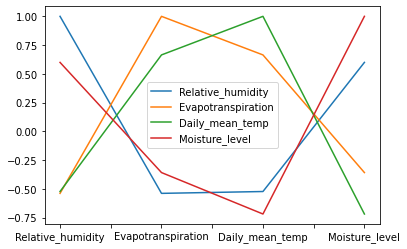

In [ ]:
soil_df_resampled.corr(method= "pearson", min_periods= 10).plot();

From the above correlation we can conclude that Moisture_level and Relative_humidity are postively correlated and likewise is the case with Evapotranspiration and Daily_mean_temp.This means that when the temperature is high the evapotranspiration is high. Similarly, when humidity is high the moisture level is high.

Our concern is predicting the moisture_level and if we see the other three variables of Relative_humidity, Evapotranspiration and Daily mean temperature impact the level of moisture. If we observe the last column or the last row we can conclude that increse in relative humidity will lead to increase in moisture level, At the same time increase in temperature will lead to increase in evapotranspiration and reduce moisture level.

#####**Checking the distribution of variables individually using subplots**

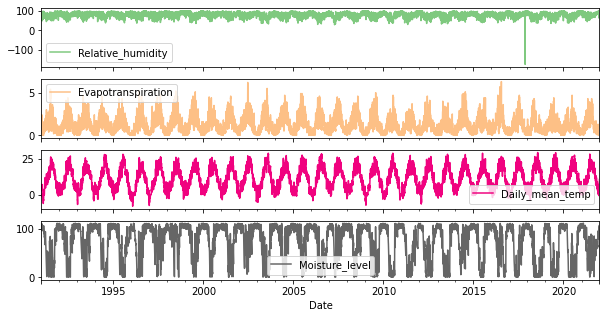

In [ ]:
soil_df_resampled.plot(figsize = (10,5), subplots = True, cmap = "Accent");

Viewing distribution of "moisture_level" as it is our target variable.

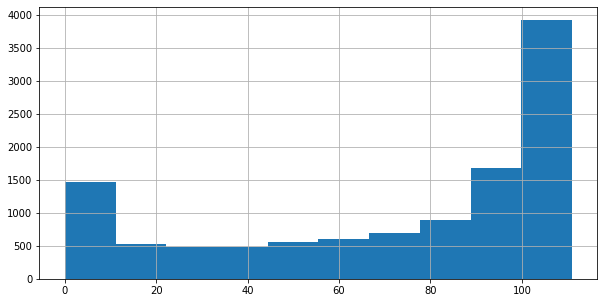

In [ ]:
soil_df_resampled.Moisture_level.hist(figsize = (10,5));
plt.title = "Distribution of Moisture level variable"

**NOTE: Due to time constraints we assume that values for all features are for covered soil as BF10(target variable) is covered soil.**

#####**Feature selection**

After seeing the correlatedness of the features, its time to check if we need all the features or could we eliminate some. In order to do the same we shall try our hands on **regularisation** and **feature engineering**.

**Regularisation**
The word regularize means to make things regular or acceptable.Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.(Ref:https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea)
In short, regularisation are methods where the values of co-efficients of variables are minimalised with a goal to incure least empirical risk,prevent from overfitting or underfitting of the model on the data and last but not least to measure the generalisation of the model.

Regularization eventually may lead to some of the parameters be set equal to zero, that is by imposing zero weight to corresponding features, essentially canceling them out fromthe model. Hence, we can also regard regularization as a feature selection process as well.(Ref:http://file.biolab.si/textbooks/ml1/feature-selection.pdf)
In this project we will look as two types of regularisations **L1 and L2**.

**Feature Engineering**
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling.(Ref:https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10)

Feature engineering helps in augmenting efficiency of the model, develop easier algorithms that fit the data thus enable detect patterns in the data. It also enables greater flexibility of the features.
In this project we will try to feture engineer using **Randomforest**.




#####**1.L1 Regularisation**

L1 or LASSO  (Least Absolute Shrinkage and Selection Operator) technique is one where computation is done using the absolute values of co-efficients as penalty term to the loss function (Ref:https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c). If visulaised, this method has sharp edges which may cause hinderance in terms of the learning to take place. It works by adding a penalty term to the error function used by the training algorithm. The additional term penalizes large-magnitude weight values.(Ref:https://visualstudiomagazine.com/articles/2017/12/05/neural-network-regularization.aspx)

The L1 technique shrinks the co-efficients of the less important feartures to zero, hus eliminating the feature altogether. This techniques is advisable for feature selection where there ae large number of features in the dataset.(Ref:https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

#####**2.L2 Regularisation**

L2 or Ridge Regression technique of regularisation is one where computation is done using the squared values of co-efficients. Unlike L1 here, the squared values are added as a cost term/ penalty term (also can be called as learning rate of this regulariser). This helps in smoothing the learning rocess as sharp edges are eliminated. This method is definetly an improvemnt over L1 as it controls the size of the weights of the co-efficients but not their direction. This method also helps in penalising the correlation bias. Choice of the cost function plays a very important role here as too large a cost function may cause too much a weight leading to under-fitting of the model. The plus here is that L2 can be used as a regulariser to avoid over-fitting.

We can use the classes in sklearn libraries in implementing these regularisation methods. Below will be mentioned the libraries and classes and a few lines of code pertaining to this. However, we will not be implementing the same in this project for two reasons: firstly, the number of features of this data is not very large and finally, prevailing time-constraints.

*Importing libraries and classes*

In [ ]:
#from sklearn.linear_model import Ridge, Lasso

*Instantiating the classes*

In [ ]:
#L2 = Ridge(alpha= 0.01)  ## note that this is penalty rate and should always be stated as a float. Here we have assigned a random value.
#L1 = Lasso(alpha = 0.025) ##note that this is penalty rate and should always be stated as a float

Alternatively we can do the same using keras library as well. Here we need to specify the same as a paramenter in the Dense layer of the model (Ref:https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/)

In [ ]:
# from keras import regularizers
# model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01) ## here it is a Sequential API Dense layer

#####**3.RandomForest**

Random forest is a parallel ensemble or an extension of bootstrap aggregation (bagging) of decision trees algorithms that can be used for classification and regression problems.

Bagging is an effective ensemble algorithm as each decision tree is fit on a slightly different training dataset (a few samples may be repeated as this works on the grounds of sampling with replacement), and in turn, has a slightly different performance. Decision tree models used in the ensemble are unpruned, making them slightly overfit to the training dataset. This is desirable as it helps to make each tree more different and have less correlated predictions or prediction errors. Predictions from the trees are averaged across all decision trees resulting in better performance than any single tree in the model.

A prediction on a regression problem is the average of the prediction across the trees in the ensemble. A prediction on a classification problem is the majority vote for the class label across the trees in the ensemble.

Random forest involves constructing a large number of decision trees from bootstrap samples from the training dataset, like bagging.At the same time it also involves selecting a subset of input features (columns or variables) at each split point in the construction of trees. Constructing a decision tree involves evaluating the value for each input variable in the data in order to select a split point. By reducing the features to a random subset that may be considered at each split point, it forces each decision tree in the ensemble to be more different.
(Ref:https://machinelearningmastery.com/random-forest-ensemble-in-python/)

**NOTE:** In this project Ramdomforest is used for feature selection method.

**Let's see how Randomforest works in feature selection**

Feature selection using Random forest comes under the category of Embedded methods. Embedded methods combine the qualities of filter and wrapper methods. They are implemented by algorithms that have their own built-in feature selection methods. High accuracy, better generalisable and interpretable are some of the benefits of embedded methods.

How does Random forest select features?

Random forests consist of 4 –12 hundred decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or combination of features. At each node (this is at each question), the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived from how “pure” each of the buckets is.
For classification, the measure of impurity is either the Gini impurity or the information gain/entropy and for regression the measure of impurity is variance.

Therefore, when training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

Also note that features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.(Ref:https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f)

**Reminder to a good practice**

A good practice in most steps of model building is to try most trial and error on training dataset. Likewise, a good practice here too is to select the features by examining only the training set. This is to avoid overfitting. Thus we will create a variable to assign and signify the data to be used.


In [ ]:
# dataset_in_use = soil_df_validation

**Importing Randomforest related libraries**

(Ref:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

**Instantiating both classes of RandomForestClassifier and SelectFromModel**

From RandomForestClassifier we will be selecting the features, so the code goes as below. `SelectFromModel` will select those features which importance is greater than the mean importance of all the features by default, however, this threshold may be altered.(Ref:https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f)

In [ ]:
features_selection = SelectFromModel(RandomForestClassifier(n_estimators = 100))

**Fitting train data to the instantiated object**

In [ ]:
features_selection.fit(soil_df_resampled, soil_df_resampled.Moisture_level)

SelectFromModel(estimator=RandomForestClassifier())

**Viewing the important features**

One can see the list of features that are important by using the `get_support()` method on the fitted model. This will return an array of boolean values. True for the features whose importance is greater than the mean importance and False for the rest.

But we also need the count and names of the important features. In order to do this we need to make a list of important features and check its length.

Let us see the important features of this dataset.

In [ ]:
display("Important features: ", features_selection.get_support())


'Important features: '

array([False, False, False,  True])

**Storing list of important features in a variable**.
This is done for further use.

In [ ]:
list_of_important_features = soil_df_resampled.columns[(features_selection.get_support())]


In [ ]:
display("Dataset feature details:")
display("Names of important features: ", list_of_important_features)
display("Length of important_features_list: ", len(list_of_important_features))

'Dataset feature details:'

'Names of important features: '

Index(['Moisture_level'], dtype='object')

'Length of important_features_list: '

1

**Getting some details of important features**

Here we will display important features on train and validation datasets. This is done as a measure to evaluate or cross-check if it is the same for both the datasets. This enables us in taking a better conclusions on the features to be selected for progression in the project.

*Note: As a side note, I just tried doing this and moved the train_test_split section below*

In [ ]:
# display("Train dataset feature details:")
# display("Names of important features: ", list_of_important_features)
# display("Length of important_features_list: ", len(list_of_important_features))

In [ ]:
# display("Validation dataset feature details:")
# display("Names of important features: ", list_of_important_features)
# display("Length of important_features_list: ", len(list_of_important_features))

From the above two codes we can conclude that we can proceed building a univariate model as there is only one important feature which will help serve the objective of this project.
To make our work simple we will drop the not important columns from the current dataset. However, this will be done after making a deep copy of the existing database.

In [ ]:
soil_df_resampled_backup = soil_df_resampled.copy(deep = True)

Dropping variables that are not impacting the progression of this project

In [ ]:
soil_df_resampled.drop("Relative_humidity", axis = 1, inplace = True)
soil_df_resampled.drop("Evapotranspiration", axis = 1, inplace = True)
soil_df_resampled.drop("Daily_mean_temp", axis = 1, inplace = True)

In [ ]:
soil_df_resampled.shape

(11323, 1)

In [ ]:
soil_df_resampled.head()

,Moisture_level
Date,
1991-01-01,102.0
1991-01-02,110.0
1991-01-03,110.0
1991-01-04,106.0
1991-01-05,109.0


In [ ]:
soil_df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11323 entries, 1991-01-01 to 2021-12-31
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Moisture_level  11323 non-null  float64
dtypes: float64(1)
memory usage: 176.9 KB


In [ ]:
soil_df_resampled.describe()

,Moisture_level
count,11323.000000
mean,71.004063
std,37.056605
min,0.000000
25%,41.000000
50%,88.000000
75%,102.000000
max,111.000000


**Some visualisations**



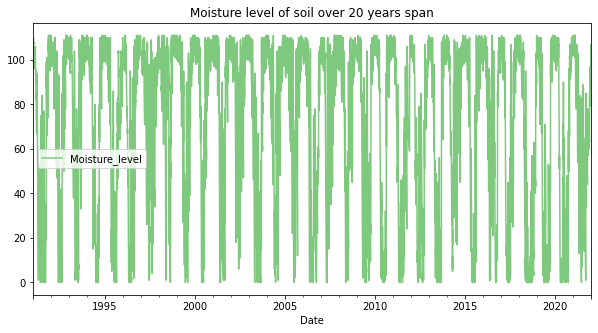

In [ ]:
soil_df_resampled.plot(figsize = (10,5), title = "Moisture level of soil over 20 years span", cmap = "Accent" );

Now let us plot some Autocorrelations.

While ACF (autocorrelation function) observes correlations "naively" with some amount of time-points, PACF (partial autocorrelatoin function) tries to control for the fact, that the effect of points in time travel through the series, so if there is a very influential effect in an early point in time, its effect would be influencing all next time points, making them look also influential. In PACF this is controlled for.
(Ref:https://colab.research.google.com/drive/16RDjy8_vjZZxS4S3DjTpefAE1YszzQJh#scrollTo=MBFUHYGDZuwQ)

*Import libraries*
 We need to import libraries from statsmodels. The libraries are specified below.
`from statsmodels.graphics.tsaplots import plot_acf, plot_pacf`
(Ref: https://colab.research.google.com/drive/16RDjy8_vjZZxS4S3DjTpefAE1YszzQJh#scrollTo=MBFUHYGDZuwQ)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


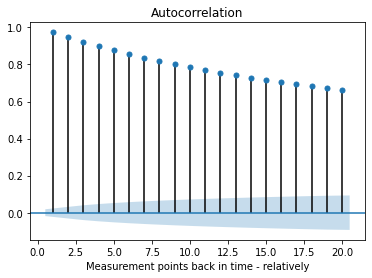

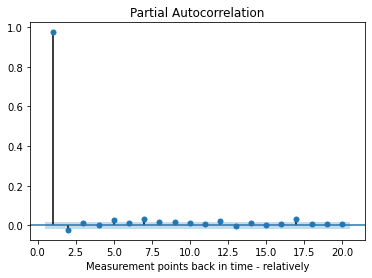

---


In [ ]:
plt.close()
plot_acf(soil_df_resampled["Moisture_level"].values, lags=20, zero=False)
plt.xlabel("Measurement points back in time - relatively")
plt.show()
plot_pacf(soil_df_resampled["Moisture_level"].values, lags=20, zero=False)
plt.xlabel("Measurement points back in time - relatively")
plt.show()
print("---")

###**Working on components of time series data**

Time series data is a sequence of data points that measure some variable over ordered period of time. It is the fastest-growing category of databases as it is widely used in a variety of industries to understand and forecast data patterns. So while preparing this time series data for modeling it’s important to check for time series components or patterns.

**1. Trend is one of the components of time-series data. It is a pattern in data that shows the movement of a series** to relatively higher or lower values over a long period of time. In other words, a trend is observed when there is an increasing or decreasing slope in the time series. Trend usually happens for some time and then disappears, it does not repeat. A trend could be an upward one, a downward one or horizontal (also called stationary trend)
(Ref: https://www.geeksforgeeks.org/what-is-a-trend-in-time-series/#:~:text=Trend%20is%20a%20pattern%20in,disappears%2C%20it%20does%20not%20repeat.)

Identifying and understanding trend information can aid in improving model performance by quicker modeling, simplify modeling and use trend information, directly or as a summary, to provide additional information to the model. Trends could be:
- Deterministic Trends: These are trends that consistently increase or decrease. These are easier to identify and remove
- Stochastic Trends: These are trends that increase and decrease inconsistently.

Trends could also be:
- Global Trends: These are trends that apply to the whole time series.
- Local Trends: These are trends that apply to parts or subsequences of a time series.
(Ref:https://machinelearningmastery.com/time-series-trends-in-python/)

**How to manage this trend while working on a time-series project?**
- **Identifying a trend** : We need line plots to identify trends. We can obtain line plots by using `df.plot()` to visualise the trend. We can also add linear and non-linear trend lines to plots to check if there obiviously is a trend. Also bear in mind that identifying a trend in a time series can be a subjective process. As such, extracting or removing it from the time series can be just as subjective.

- **Removing a Trend** : A time series with a trend is called non-stationary. An identified trend can be modeled. Once modeled, it can be removed from the time series dataset. This is called detrending the time series. If a dataset does not have a trend or we successfully remove the trend, the dataset is said to be trend stationary.

From a machine learning perspective, a trend in data can either remove information (to remove systematic information that distorts the relationship between input and output variables), or add information (to add systematic information to improve the relationship between input and output variables)

A good practice is to detrend the data (if there is a trend). Detrending involves removing the effects of trend from a data set to show only the differences in values from the trend; it allows cyclical and other patterns to be identified.Detrending the data will allow you to see any potential subtrends, which can be incredibly useful in various business functions or even is the field of science.(Ref:https://www.investopedia.com/terms/d/detrend.asp)


**2. Seasonality** is alo a component of time series data. It is the increase or decrease of values occuring at some regular intervals.

**3. Residual** is the third component of time-series data. Once trend and seasonality are removed and data is made stationary, this remaining part is calle dthe residual. It adds noise to the data. A residual value is a measure of how much a regression line vertically misses a data point. Regression lines are the best fit of a set of data. You can think of the lines as averages; a few data points will fit the line and others will miss. A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable. (Ref: https://www.statisticshowto.com/residual-plot/


*Looking for data components*

Let us look out for trend, seasonality and residual components of data. To do the same we shall use seasonal_decompose from statsmodel. This will give us a better picture.
(Ref: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

**Trying to know the presence of various components in the dataset**

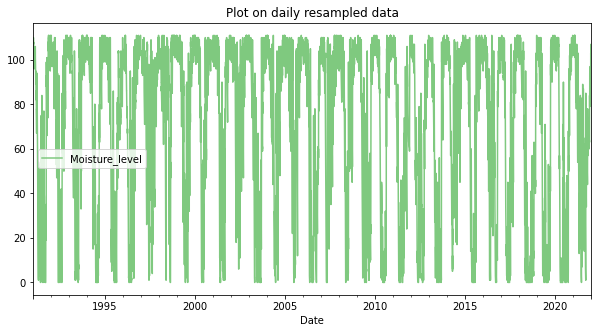

In [ ]:
soil_df_resampled.plot(figsize = (10, 5), title = "Plot on daily resampled data", cmap = "Accent");

*Import libraries*

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

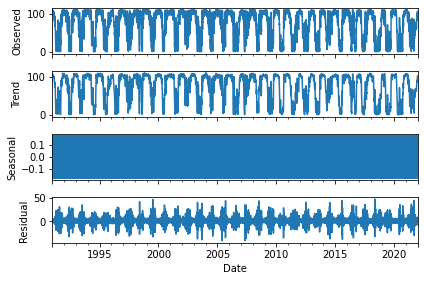

In [ ]:
seasonal_decompose(soil_df_resampled).plot();

The graph is too packed, so let's aggregate/resample the data to a monthly frequency and try again:

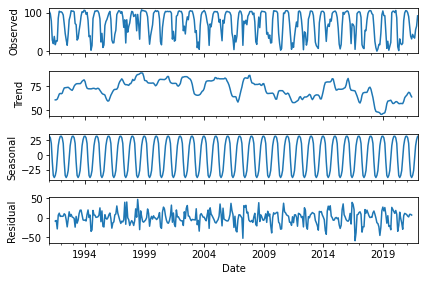

In [ ]:
seasonal_decompose(soil_df_resampled.resample("M").mean()).plot();

From the above plot we can come to some conclusions:
1. **Trend:** the trend of the data seems to be trailing upwards in the last few years. This could be a result of water conservation approach, the pandemic effect (no human interface with natural processes for a considerable length of time), etc.

2. **Seasonality:**You can start to see a pattern - moisture_level peaks and troughs seem to be very seasonal and repetitive. This makes sense, considering weather patterns, changes in population, etc.

3. **Residual:** We see that most data falls within the regressive range except for some fluctuations which could be due to seasonality. These fluctuations shall be taken care when we normalise data.

We now need to move on to actually making our series stationary. Always keep in mind that in order to use time series forecasting models, it is necessary to convert any non-stationary series to a stationary series first.

This can be done using simple differencing method or seasonal differencing method. I tried the seasonal differencing method (with 365 days period lag) but it results in loss of data. Keeping time constraints in mind we shall proceed with simple differencing method to convert the data into stationary series.
(Ref :https://colab.research.google.com/drive/1yKe1GPDcld3n_ing8mxlclsP00I61Lkf#scrollTo=xEwTQaDFcUnc)

**Why do we need to make data stationary?**
A Non-Stationary is sometimes known as a 'Random Walk' - which are notoriously difficult to forecast, because the underlying properties keep changing (e.g. like trying to hit a moving target). (Ref:https://ayc-data.com/data_science/2020/04/19/electricity-forecasting-with-data-science.html)

**Note:** We need to add back the trend and seasonality once the forecast is made.

**Detrending data** We will use the `df.diff()` function called on our dataframe to detrend data. (Ref:https://colab.research.google.com/drive/16RDjy8_vjZZxS4S3DjTpefAE1YszzQJh#scrollTo=MBFUHYGDZuwQ). We have one value - the first one, as NaN. We shall fill this using`df.fillna(method = "backfill", inplace = True`. We are filling NaN value with backfill so as to maintain the originality of the data and not bring about unnecessary variations.



*Note: all these will be done after making a deep copy of our orginal training data, which we may need to add back the trend and seasonality after prediction.*

In [ ]:
soil_df_resampled_backup = soil_df_resampled.copy(deep = True)

In [ ]:
detrend_diff_period = 1

Let us visualise the original dataframe as well as the detrended one

In [ ]:
detrended_soil_df_resampled = soil_df_resampled.diff(detrend_diff_period)
detrended_soil_df_resampled

,Moisture_level
Date,
1991-01-01,NaN
1991-01-02,8.0
1991-01-03,0.0
1991-01-04,-4.0
1991-01-05,3.0
...,...
2021-12-27,-2.0
2021-12-28,7.0
2021-12-29,3.0


Let us know if any null values available due to differencing.

In [ ]:
detrended_soil_df_resampled.isnull().sum()

Moisture_level    1
dtype: int64

Let us fill this value with backfill so that we have no missing values and at the same time trying to maintain data within the similar range as it can be. Also this will help avoid varied fluctuations which could arise if we filled it with a zero.

In [ ]:
detrended_soil_df_resampled.fillna(method= "backfill", inplace= True)
detrended_soil_df_resampled

,Moisture_level
Date,
1991-01-01,8.0
1991-01-02,8.0
1991-01-03,0.0
1991-01-04,-4.0
1991-01-05,3.0
...,...
2021-12-27,-2.0
2021-12-28,7.0
2021-12-29,3.0


In [ ]:
detrended_soil_df_resampled.isnull().sum()

Moisture_level    0
dtype: int64

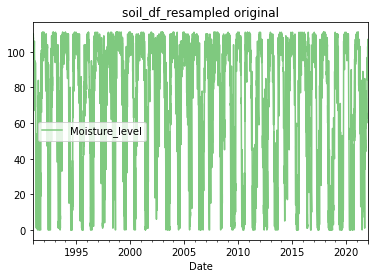

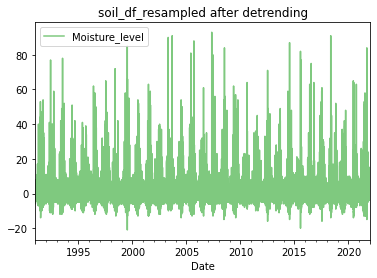

In [ ]:
soil_df_resampled.plot(title = "soil_df_resampled original", cmap = "Accent");
detrended_soil_df_resampled.plot(title = "soil_df_resampled after detrending", cmap = "Accent");

We can see the difference where trend has been removed. We have also taken care of filling the missing values that arised due to detrending data. Now lets try taking a bigger leap by working on **seasonality**. Here too we can remove seasonality using the `df.diff(deseasonalise_diff_period)`.

How do we know the seasonality cycle? This is a big question. Answer to this question will help us choose the correct diff_period. From the seasonal_decompose() we saw that the first graph where data was resampled on daily basis was too packed so we plotted the same seasonal decompose by resampling data on a monthly basis. This second graph showed us the true trend and seasonality. From this graph we know that the seasonality is a yearly cycle. Thus we will choose our diff_period to be 365 days of the year as our data is resampled based on observation per day.

*Note: We are ignoring the leap year calculation and assuming that there would not be drastic change in the mean value of the moisture level around the similar span of the year.*

(Ref: https://colab.research.google.com/drive/16RDjy8_vjZZxS4S3DjTpefAE1YszzQJh#scrollTo=MBFUHYGDZuwQ)

In [ ]:
deseasonalise_diff_period = 365

In [ ]:
deseasonalised_soil_df_resampled = detrended_soil_df_resampled.diff(deseasonalise_diff_period)
deseasonalised_soil_df_resampled

,Moisture_level
Date,
1991-01-01,NaN
1991-01-02,NaN
1991-01-03,NaN
1991-01-04,NaN
1991-01-05,NaN
...,...
2021-12-27,-8.0
2021-12-28,6.0
2021-12-29,8.0


Let us check for missing values which are obivious to be because of differencing.

We will fill the missing values using `df.interpolate( method= "linear", limit_direction= "backward", inplace= True)`

We use interpolation to fill missing values as it uses various interpolation technique to fill the missing values rather than hard-coding the value. We select linear method as we are working on univariate data and limit_direction backwards as we need to fill the initial values of the sequence.

(ref:https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)


In [ ]:
deseasonalised_soil_df_resampled.isnull().sum()

Moisture_level    365
dtype: int64

In [ ]:
deseasonalised_soil_df_resampled.interpolate(method = "linear", limit_direction= "backward", inplace= True)


Let us check if any NaN values now.

In [ ]:
deseasonalised_soil_df_resampled.isnull().sum()

Moisture_level    0
dtype: int64

Things seem fine to proceed.

In [ ]:
deseasonalised_soil_df_resampled

,Moisture_level
Date,
1991-01-01,-9.0
1991-01-02,-9.0
1991-01-03,-9.0
1991-01-04,-9.0
1991-01-05,-9.0
...,...
2021-12-27,-8.0
2021-12-28,6.0
2021-12-29,8.0


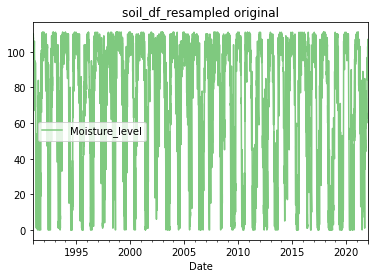

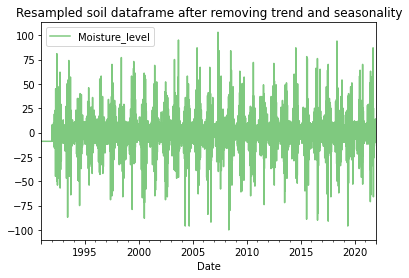

In [ ]:
soil_df_resampled.plot(title = "soil_df_resampled original", cmap = "Accent");
deseasonalised_soil_df_resampled.plot(title = "Resampled soil dataframe after removing trend and seasonality", cmap = "Accent");

Saving values for the first year from the original resampled data - daily basis. We will use these original values to fill our null values that occured as a result of removing seasonality. This will help us maintain originality and avoid unnecessary fluctuations in data as well.

Let us make a deep copy of this for further use with an appropriate name. Proceeding further we shall use the copied dataframe.

In [ ]:
soil_df = deseasonalised_soil_df_resampled.copy(deep= True)

In [ ]:
soil_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11323 entries, 1991-01-01 to 2021-12-31
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Moisture_level  11323 non-null  float64
dtypes: float64(1)
memory usage: 176.9 KB


In [ ]:
soil_df.isnull().sum()

Moisture_level    0
dtype: int64

Now our data seems good to proceed for spliting, normalising and model building.


###**Splitting Data into training and test data**

We need to divide data into train, validation and test data.
(Ref:https://colab.research.google.com/drive/1DHimbI87BU-LNS8ee3hPeCn3vLmw5uw2#scrollTo=ok_llRypceo6)

We shall build and train the model on the train data. Any hyperparameter tuning should be done here.

We shall evaluate the train data prepared model using the validation data. This will show us how good or bad a fit the model is. Any adhoc changes may be done if required.

We shall test the final model post any changes after evaluation, on the test data. This will tell us the true outcome of our model, as to how reproducable is the model on a related but unseen dataset.

The approach for this is simple sklearn function of `train_test_split(dataframe_name)`. Some reasons to use this method are:
1. Time constraint in trying other cross-validation methods such as GridSearchCV, etc.
2. K_fold cross validation method is not advisable to use for time-series analysis because a test data may occur before or inbetween training data. This may lead to forecasting data before training the model and/or create gaps in time-series. Both of which are not a good practice.(Ref:https://towardsdatascience.com/dont-use-k-fold-validation-for-time-series-forecasting-30b724aaea64)

*Note:For reproducibility, we have to fix the seed for the pseudo-random generator, so in case of repeated testing, we can compare results.*

**Note:** Also rmember to set the shuffle parameter while spliting data to "false" in a time-series data



**import library for train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

**Train Test split**

Here we are dividing the resampled data into training data and testing data. we take test data to be 25% of the entire data. We need to have a test data to know how well a model works on unobserved data by measuring the models goodness of fit on unobserved data.

In [ ]:
soil_df_to_train, soil_df_test = train_test_split(soil_df, test_size= 0.25, shuffle = False, random_state= 7)

In [ ]:
soil_df_to_train

,Moisture_level
Date,
1991-01-01,-9.0
1991-01-02,-9.0
1991-01-03,-9.0
1991-01-04,-9.0
1991-01-05,-9.0
...,...
2014-03-28,-3.0
2014-03-29,-6.0
2014-03-30,-2.0


In [ ]:
soil_df_test

,Moisture_level
Date,
2014-04-02,0.0
2014-04-03,-4.0
2014-04-04,1.0
2014-04-05,2.0
2014-04-06,-1.0
...,...
2021-12-27,-8.0
2021-12-28,6.0
2021-12-29,8.0


From the remaining 75% of the data we will set aside 35% of this 75% data as validation data. We need this set of data, firstly, to be a good representation of test_data (thus we keep aside 35% of data to be trained for this), and finally, to evaluate our model to know how good a fit it has been. Models are always evaluated on validation data prior to testing the same on unobserved data.

In [ ]:
soil_df_train, soil_df_validation = train_test_split(soil_df_to_train, test_size= 0.35, shuffle = False, random_state= 7)

The result of the above two train_test_split codes is that we were able to divide data into train_data, validation_data and test_data with names **soil_df_train, soil_df_validation and soil_df_test** respectively.


In [ ]:
soil_df_train

,Moisture_level
Date,
1991-01-01,-9.0
1991-01-02,-9.0
1991-01-03,-9.0
1991-01-04,-9.0
1991-01-05,-9.0
...,...
2006-02-05,3.0
2006-02-06,3.0
2006-02-07,2.0


In [ ]:
soil_df_validation

,Moisture_level
Date,
2006-02-10,-17.0
2006-02-11,4.0
2006-02-12,-9.0
2006-02-13,-2.0
2006-02-14,4.0
...,...
2014-03-28,-3.0
2014-03-29,-6.0
2014-03-30,-2.0


**Basic EDA on train data**

In [ ]:
soil_df_train

,Moisture_level
Date,
1991-01-01,-9.0
1991-01-02,-9.0
1991-01-03,-9.0
1991-01-04,-9.0
1991-01-05,-9.0
...,...
2006-02-05,3.0
2006-02-06,3.0
2006-02-07,2.0


In [ ]:
display("Shape of training data: ", soil_df_train.shape)
display("Shape of validation data: ", soil_df_validation.shape)
display("Shape of test data: ", soil_df_test.shape)

'Shape of training data: '

(5519, 1)

'Shape of validation data: '

(2973, 1)

'Shape of test data: '

(2831, 1)

The above details seem to give us a feel on spliting of data to be in an appropriate manner.



In [ ]:
display("Null values in training data: ", soil_df_train.isnull().sum())
display("Null values in validation data: ", soil_df_validation.isnull().sum())
display("Null values in test data: ", soil_df_test.isnull().sum())

'Null values in training data: '

Moisture_level    0
dtype: int64

'Null values in validation data: '

Moisture_level    0
dtype: int64

'Null values in test data: '

Moisture_level    0
dtype: int64

Now things seem fine. We shall start working towards model construction. We shall use training data to build and train the model, validation data to evaluate the model and test data to make  the forecast.

### Normalising data

 We have to normalise data which can be done using scaling. A normalized data lead to better performance in Neural Networks.For this we will use sklearn's MinMaxScaler.

**Why MinMAxScalar?** The two main reasons are:
1. It is important to ensure that the scale of the output is in the range -1 to +1 to keep it within the scale of the activation function (tanh - which is -1 to +1) on the output layer of LSTM as our final model is built and trained on LSTM.
2.input variables are better to be small values, probably in the above mentioned range.

(Ref:https://towardsdatascience.com/predictive-analysis-rnn-lstm-and-gru-to-predict-water-consumption-e6bb3c2b4b02)



**Importing library**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

**Instantiate the class StandardScaler**

We will normalise data within the range of -1 to +1. This will be in accordance with the activation function of LSTM Model, that we desire to build.

In [ ]:
scaling_soil_df = MinMaxScaler(feature_range = (-1, 1))

**Fit and transform** the dataframes of train, validation and test to normalise their values.

In [ ]:
soil_df_train_scaled = scaling_soil_df.fit_transform(soil_df_train)

In [ ]:
soil_df_validation_scaled = scaling_soil_df.fit_transform(soil_df_validation)

In [ ]:
soil_df_test_scaled = scaling_soil_df.fit_transform(soil_df_test)

In [ ]:
soil_df_train_scaled

array([[-0.08900524],
       [-0.08900524],
       [-0.08900524],
       ...,
       [ 0.02617801],
       [ 0.06806283],
       [ 0.02617801]])

#Models

There are many many predictive anaytical methods in both classical machine learning and neural network methods, which can be used to develop a forecasting business model. Some classical machine learning methods include linear regression, exponential smoothing, ARIMA, SARIMA, etc. The neural network methods that I am aware are RNN and LSTM.

As this project is a time series data, we will be looking into:
- ARIMA - a classical machine learning model
- RNN - a neural network model
- LSTM - a neural network model

*Note: We will discuss how ARIMA and RNN works along with providing code for reference. But the actual working model would be built using the LSTM method.*

#ARIMA (AutoRegressive Integrated Moving Average)

This is a classical machine learning predictive model building method. is a traditional modeling technique, which - as its name implies - uses autoregression and a moving average component to model the "present moment" with respect to prior moments with an autoregressive and some smoothed moving average - these are the AR and MA in the names. The integral part (the I) comes from the fact that ARMA is extended, and is applied to the differenced time series, thus representing "trend". I=1 is the first difference, it represents linear trend.

AR = autoregressive: forecast the variable using a linear combination of its past values
MA = moving average: value to forecast is assumed to be a weighted moving average of the past forecast errors
I = integral: the degree of differencing to be used (1 = linear trend, 2 = second-order differencing needed to get to stationarity). It is a statsmodel and is well suited for "online learning".(Ref:https://colab.research.google.com/drive/16RDjy8_vjZZxS4S3DjTpefAE1YszzQJh#scrollTo=eWSm9WCSZuwW)

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used. The parameters of the ARIMA model are defined as follows:
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.(Ref:https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

*Just as a side note - A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.*

The ARIMA model can be used to forecast future time steps. We can use the `.forecast()` function, which performs a one-step forecast using the model.
A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received. We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration. The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).(Ref:https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

Thus, to avoid manual and repetatitive work, it is advisable to use a neural network to forecast a value in a time-series data.

Below is sample model for future reference and is kept as general as possible

*Importing libraries*

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

*Instantiating the class*

In [ ]:
# arima_model = ARIMA(df, order=(5,1,0)) ## the p, d, q parameters of ARIMA here are p = 5, d = 1 and q = 0

*Fitting the model and checking its summary*

In [ ]:
# arima_model_fit = arima_model.fit() ## fitting the model
# arima_model_fit.summary() ## checking the summary of the model

**A feed forward networks**

Feed forward networks are multi-layered network of neurons. By feed forward network we mean to say that output of one layer of the model archietecture is to be given as parameter of input into the next layer of the model.As a result information flows only in forward manner. In short, one neuron would be receiving inputs from multiple independent neurons or from hidden layers  to the output nodes. There are no cycles or loops in the network.

Issues in the feed forward neural network : -

- Can’t handle sequential data.
- Consider only current input.
- Can’t memorize the previous input.

(Ref:https://medium.com/analytics-vidhya/in-depth-tutorial-of-recurrent-neural-network-rnn-and-long-short-term-memory-lstm-networks-3a782712a09f)

Thus, neural networks are designed to manage these issues of feed forward networks. Neural Networks can capture time-series data. One can build a model with an end-to-end solution with least manual work. For example, just like we saw RandomForestClassifier and SelectFromModel libraries of sklearn can be used even to get the relevent features from a large dimensioned dataset.


#Recurrent Neural Network (RNN) Model

RNN - Recurrent Neural Network (RNN) is a special type of feed forward network of neural networks that is powerful for modeling sequence data such as time series or natural language. This is the main difference of an RNN architecture as compared to a CNN archietecture.

In RNN, the output of one layer is dependent on the current input along with the set of previous inputs. This special feature has an advantage to take help of inputs obtained before to predict outputs at the later stage.
Also we have an `Embedding()` class which helps in taking care of dimensionality of  input data.

There are four types of RNN archietectures:
1. One-to-one : It is also called *vanilla neural network*. It is applicable to resolve basic machine learning problems.
2. One-to-many : It has one input and many outputs. This is used widely in image captioning tasks.
3. Many-to-one : This has many inputs and one output. It is widely applicable in natural language processing.
4. Many-to-many : Has sequence of inputs and generates sequence of outputs. Helps in machine translation such as Google translate. (Ref:https://medium.com/analytics-vidhya/in-depth-tutorial-of-recurrent-neural-network-rnn-and-long-short-term-memory-lstm-networks-3a782712a09f)

**Problems being faced while training a RNN**
1. **Vanishing Gradient Problem :** As the deep neural network follows the chain rule all gradients (which is the learning parameter) travels in back-propogation to the initial layer. If the weights / gradients are below 1, they keep shrinking exponentially until the time they vanish. This is the problem of vanishing gradients. This eventually results in longer training time and at the same time loss of information.
2. **Exploding Gradient Problem :** On the other hand, if gradients whose values are greater than 1, get larger as the chain rule is followed and back-propogation happens. This blows up or increases the weights of gradients to such an extent that it may crash the model. This is the problem of exploding gradient.

The effects of the above stated problems is that training a model becomes a time-consuming yet leading to poor performance and not so good accuracy - as some gradients have either vanished while some have blown up.

*Note: As in previous case of the ARIMA Model, we will specify the sample code for future reference and keep it general.


*Importing libraries*

There are three classes of RNN in keras. We shall provide only the importing code for all three just for our knowledge.

*Note: This section pertains to SimpleRNN only.*

SimpleRNN is a fully-connected RNN where the output from previous timestep is to be fed to next timestep. (Ref:https://www.tensorflow.org/guide/keras/rnn)

In [ ]:
# from tensorflow.keras.layers import SimpleRNN, GRU, LSTM


*Archietecture of the model*

Neural networks follow archietecture - compilation - fit sequence of model building.

This is the archietctural section where input layers, embeded layers, logit/output layers are built as along with instantiation of some classes as required for this method of predictive model.

*Note: Approach for input layers could differ based on Sequential (requires importing of class Sequential() as well) or Functional API method adopted in building the neural network.



In [ ]:
# from tensorflow.keras import Sequential

*Instantiating the class and specify model layers*

(Ref:https://www.tensorflow.org/guide/keras/rnn)

In [ ]:
# model = Sequential() # instantiating the class
# model.add(layers.Embedding(input_dim=1000, output_dim=64)) # embedding layer with input and output dimensions, (values randomly stated).

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
#model.add(layers.SimpleRNN(128)) # SimpleRNN class instantiated with output dimension as parameter

# model.add(layers.Dense(10)) Output layer with number of outputs required which will be 1 in this project
# The shape of this output is (batch_size, timesteps, units).

# model.summary() # viewing model summary

Note: in case we have more than one SimpleRNN layers we need to set the parameters `return_sequences=True, return_state=True` in the second layer. The **return_sequences** will  return the last output in the output sequence, or the full sequence which otherwise by default is set to False.
The **return_state** will return the last state in addition to the output which otherwise by default is set to False.

A RNN layer can also return the entire sequence of outputs for each sample (one vector per timestep per sample)

(Ref:https://keras.io/api/layers/recurrent_layers/simple_rnn/)

*Compilation of the model*



In [ ]:
# model.compile(loss = loss_function, optimizer = specify_optimizer, activation = activation_function)
# loss function is specified basis input data, optimizer = Adam is preferable, activation = The softmax takes the linear output of the logit/output
# neurons and normalises their probabilities which sumup to 1. Thus, it is advisable to choose "softmax" activation function.



*Fitting the model*

This is the stage where the machine learning algorithm built so far is being fed with training data from which it can learn. For doing this we use .fit() called on the model instantiated. This fits the training data to the algorithm prepared.

Note: We may also validate our model on validation data while training the model after target_data. We need to train the model on training data Any tuning of hyperparameters is also to be done only on train dataset.

In [ ]:
# history_simpleRNN = model.fit(dataframe_to_be_trained, epochs = as_in_hyperparameter, batch_size = as_in_hyperparameter)

*Getting history of the instantiated object*

To get an overall view of the model on the instantiated object we can call the `.history.keys()` on the fitted instance

In [ ]:
# history_simpleRNN.history.keys()

*Evaluating the model*

Models  should always be evaluated on the validation data. This can be done by using the `.evaluate(dataframe)`.

Once this is done, we need to plot the training and evaluation of model on graph to get an idea of our model setup.
If all seems well we can proceed to predicting the value on test data.

In [ ]:
# model.evaluate(validation_data)

*Predicting*

This to be done on test data only using the function `.predict(dataframe)` on the instantiated model.

In [ ]:
# model_prediction = model.predict(dataframe)

# Long Short Term Memory (LSTM) Model

An **LSTM - Long Short Term Memory** is a special kind of feed-forward recurrent neural network which canhandle sequential data and manage information persistently. The added advantage is that LSTM neural network is also capable of handling the *vanishing gradient* problem which was being faced by other neural networks such as RNN. In short, LSTMs are explicitly designed to avoid long-term dependency problems that arise due to vanishing gradient.
(Ref:https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/)

**Overcoming the problems of RNN**

As seen above there we some major issues with RNN which ought to be fixed. This led to the neural network of ResNet (Residual Network). In this network system, some kind of a highway was set which is directly connected to the output, by by-passing the neurons. These highway points are called **the cell-state**. In addition to this, a gradient clipping technique was appended to the archietecture which artificially limited the gradients during back-propogation. This reduced the problem of exploding gradients.
This structure of neural network is called the **Long short term Memory or the LSTM**. One can consider that LSTM is an improvised form of RNN.


**How does a LSTM model work?**

Firstly, as specified above, LSTMs are capable of **avoiding long-term dependencies**. This model is designed with a highway platform. As data is being trained, at each interval the some internal calculations are done and weights are being stored in these highway points (also called as **cell state**). These weights are stored until the final output is computed.

Secondly, LSTMs have **Gates** structure which is a  combination of non-linear activation and point-wise opertion. gates regulate the flow of information. At each neuron a decision is taken on the action to be taken on the weight values (Sigmoid (elimainates / retains values basis 0 and 1 - selects positions that are relevant) and tanh (updates values basis its range of +1 to -1, that is, it normalises the highway vector between -1 and 1)). This is where the problem arising from **vanishing gradient** is taken care.

**Process flow of the LSTM-Model:**
The memory cell of LSTM has three gates (input, forgot, and output gate). They are used to control the flow from the input to the output of the cell. The input gate will control the new information when it can enter the memory. The forgot gate will check the existance of information in the memory and determines whether or not the cell can remember new data. Finally, the information in the cell is determined to be used in the output cell by the output gate. Each cell contains weights to control each gate. These weights are optimized by a training algorithm based on an error resulting of network output. (Ref:file:///C:/Users/user/Downloads/applsci-11-11820.pdf)

### Hyperparameters

Hyperparameters are the variables which determines the network structure(for example number of hidden units) and the variables which determine how the network is trained(such as Learning Rate). Hyperparameters are set before training(before optimizing the weights and bias).

(Ref:https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a#:~:text=Deep%20Neural%20Network%3F-,What%20are%20hyperparameters%3F,optimizing%20the%20weights%20and%20bias).)

In this project, hyperparameters are intutively chosen and the reason for choosing their value is specified. However, Hyperparameters can be tuned and better options can be chosen. This can be done using the GridSerach CV. But due to time constraints we are not diving into this for now.



**Note:** Seeding can be done for reproducibility of the model, but that is just a case of hope when it comes to neural networks. In addition to this due to time constraints we are not using the same in this project.

Seed is a function of the numpy library, whose value can be set to any random number. This random number is a value from which the function begins to generate the random number.

For example: `from numpy.random import seed` - importing the seed function from random library of numpy `seed(14)` - The seed function begins to generate the random number from 14 onwards. `tf.random.set_seed(19)` - sets a global random seed while using tensorflow library.

*Parameter for LSTM units**

An LSTM - how ever strange that may sound - can be considered to be a complete layer. The most important parameter of it is the "number of (memory) units", which is the length of the hidden state vector, thus, the memory capacity. Warning: this does not have any relationship to input size, thus can be considered a freely chosen parameter.(Ref: https://colab.research.google.com/drive/1wVPdLfo_ue9MYSMnZpuIO6gk_2BWGHzh#scrollTo=R8IYutdnW_SG)

There is no one-size-fits-all approach for determining the hidden size as it really depends on the task at hand. We Can Start with a small hidden size, such as 128 or 256. If the model underfits, then we need to expand to 512, 1024, or more. Increasing the model’s capacity will generally help fit the training data. (Ref:https://www.quora.com/How-does-one-determine-the-optimal-number-of-units-and-other-settings-for-an-LSTM-neural-network-layer-other-than-trial-and-error)

The more the number of neurons the deeper is the learning. The number of layers and cells required in an LSTM might depend on several aspects of the problem such as the complexity of the dataset, such as the number of features, the number of data points, objective of the project, the accuracy required for the use case, etc.

*Note: We willbe taking only 5 neurons here so as to avoid any RAM issues.*

We will save this in a variable so that we can abide by the general applicability rule.

In [ ]:
lstm_units = 5

*Parameter for timestep*

In this project, we shall have time_steps = 7. It means that the model makes predictions based on the previous 7 days data.
This is a totally independent and intutive choice bearing in mind that there would not be any drastic fluctuations in values of moisture level in a week. However, This could be changed as per the objectives set for every individual case.

(Ref:https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/)

In [ ]:
timesteps = 7

*Parameter for number_of_epochs*

In [ ]:
epoch_count = 30

*Parameter for batch_size*

Training data in reasonably small batches helps yield efficient results in reasonable time. Small number of samples are faster to train than one huge chunk of data. Also processing data in batches enables us to get closer to the global optimum in terms of loss. Depending on the size of the dataset, an ideal batch_size usually ranges between 32 to 250.



In [ ]:
batch_size = 32

*Number of forecast values*

By this we mean the number of output values or forecast values.
For the purpose of maintaining the genalisation approach we shall save the value in a variable so that it may be altered in future if required without much hassle.

In [ ]:
count_of_forecast_values = 1

*Dropout*

As we will have a stacked LSTM layer Model we shall have dropout values. This will help us in bringing about some regularisation in learning. The rates taken fall within the range 0 to 1, as tens of percentages, by default.

In [ ]:
dropout_rate = 0.1

###Data Preparation

Before a univariate series can be modeled, it must be prepared.

The LSTM model will learn a function that maps a sequence of past observations as input to an output observation. As such, the sequence of observations must be transformed into multiple samples from which the LSTM can learn. (Ref: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)

Here we will convert the dataset into independent and dependent variables based on timesteps as set in the hyperparameter.
(Ref:https://www.analyticsvidhya.com/blog/2021/06/time-series-analysis-recurrence-neural-network-in-python/)
(Ref:https://www.youtube.com/watch?v=UbvkhuqVqUI)
(Ref:https://www.youtube.com/watch?v=H6du_pfuznE)

In [ ]:
def prepare_data(dataset, timesteps):
  input_series = []
  output_list = []
  for i in range(len(dataset)-timesteps-1 ):
    input_data = dataset[i:(i+timesteps), 0]
    input_series.append(input_data)
    output_list.append(dataset[i + timesteps, 0])
  return np.array(input_series), np.array(output_list)



*Note: Logic for the above code explained in the appendix section.*

*Getting the data from the above function*
(Ref: https://colab.research.google.com/drive/1uK9Dp4p3rMDj1cbUfZ9BwEFpGrjB9M5U#scrollTo=WjUxKUkpcw7p) - from my Big Data and Machine Learning home assignment

In [ ]:
input_series, output_list = prepare_data(soil_df_train_scaled, timesteps)
input_series = np.array(input_series)
output_list = np.array(output_list)

In [ ]:
validation_input , validation_output = prepare_data(soil_df_validation_scaled, timesteps)
validation_input = np.array(validation_input)
validation_output = np.array(validation_output)

**Note:** The dataframe name has to be changed in the above  codes based on training, validation or testing stage of model building.

In [ ]:
display("Shape of input data: ", input_series.shape)
display("Shape of output data: ", output_list.shape)

'Shape of input data: '

(5511, 7)

'Shape of output data: '

(5511,)

So we can see that we have same number of samples in input data as well as output data.

Let us just glance through input and output data

In [ ]:
display("input_series: ", input_series)
display("output_list: ", output_list)

'input_series: '

array([[-0.08900524, -0.08900524, -0.08900524, ..., -0.08900524,
        -0.08900524, -0.08900524],
       [-0.08900524, -0.08900524, -0.08900524, ..., -0.08900524,
        -0.08900524, -0.08900524],
       [-0.08900524, -0.08900524, -0.08900524, ..., -0.08900524,
        -0.08900524, -0.08900524],
       ...,
       [-0.01570681, -0.04712042,  0.05759162, ...,  0.01570681,
         0.02617801,  0.03664921],
       [-0.04712042,  0.05759162, -0.0052356 , ...,  0.02617801,
         0.03664921,  0.03664921],
       [ 0.05759162, -0.0052356 ,  0.01570681, ...,  0.03664921,
         0.03664921,  0.02617801]])

'output_list: '

array([-0.08900524, -0.08900524, -0.08900524, ...,  0.03664921,
        0.02617801,  0.06806283])

**Reshaping input_series**

We shall now reshape x_train data as we need the same to be passed as value for input_shape parameter of the first LSTM layer. So we are using randomly 1 and saving the same in a variable called n_features.
(Ref:https://www.analyticsvidhya.com/blog/2021/06/time-series-analysis-recurrence-neural-network-in-python/)

In [ ]:
n_features = 1

In [ ]:
input_series_reshaped = np.reshape(input_series, (input_series.shape[0], input_series.shape[1], n_features))

In [ ]:
input_series_reshaped.shape

(5511, 7, 1)

So now our data is of three-dimensional as required for input in the LSTM layer.

Now let us start working on creating a network and building a model

### Network



**Importing required libraries**

In [ ]:

from tensorflow.keras.layers import Input, Dense, LSTM, TimeDistributed, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras import backend as K


**Historic sessions**

It is a good practice to clear previous sessions and reset everything despite using Keras. This will help eliminate chances of errors which may occur due to cached data.

First we will clear the stacked graphs and set to global default graph using `tf.compat.v1.reset_default_graph()`.

Next we will use `clear_session()`, this helps in clearing and avoiding clutter from old models and layers, especially when memory is limited. This is also called releasing the global state.

In [ ]:
tf.compat.v1.reset_default_graph()

In [ ]:
clear_session()

### Model Archietcture

**Archietecture of the model**

All models in tensorflow and Keras have a similar structure of archietecture, compilation and fitting the data on the model.

For this project, we will build the archietecture using the Sequential API approach

**Instantiating the class Sequential**

As the first step of Sequential API approach of model building, we will first instantiate this class


In [ ]:
forecast_moisture_level = Sequential()

**Embedding layer**
Time series embeddings are a representation of time data in the form of vector embeddings that can be used by different models, improving their performance. It also converts words into vectors of numbers and reduces dimensionality.

**Defining input**

The LSTM layer expects input to be in a matrix with the dimensions: [number_of_input_samples, timesteps, n_features].

1. Samples: These are independent observations from the domain, typically rows of data. `samples = input_series.shape[0]`. It the first value, the number of observations or rows, when you call the shape of the dataframe
2. Timesteps: This this the number of observations the model will take to make a prediction `input_timesteps = input_series.shape[1]`. It is the second value, that number of timesteps the model will take to foretell the future value.
3. Features: This is an independent value used to reshape the input data.`n_features = n_features`. It is a random number given to reshape the input_series .

(Ref: https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/)



**LSTM layer 1**

As we are proceeding with stacked LSTM approach, here we need to set parameter of return_sequences to True so that the result of this layer is saved and used in next stacked LSTM layer so that the next layer operates on full sequences.

We need to set return_state to True as we require the previous state in addition to the output.
(Ref: https://keras.io/api/layers/recurrent_layers/lstm/),


In [ ]:
forecast_moisture_level.add(LSTM(lstm_units, return_sequences = True, input_shape = (timesteps, n_features)))

**LSTM layer 2**

It is quite common to use multiple LSTM layers ("stacked LSTM layers") as these layers learn a hierarchy of abstract representations. that we do not only get on top of the LSTM a final prediction for a sequence, but we try to get **output the whole sequence of predictions**. This enables the next layer to operate on full sequences.

Just like in lstm_layer_1, here too we shall set return_state to be True so that we not only obtain the output but also the value of the previous state.

In [ ]:
forecast_moisture_level.add(LSTM(lstm_units, return_sequences = True))

**Logit / output layer**

Here we are in a forecastiong task and we need one value of forecast

1. **Shape of output** is the number of units that we need to have in our forecast, that is always equal to the **count_of_forecast_values**

2. What is the **activation function** to be considered?  The softmax takes the linear output of the logit/output of neurons and normalises their probabilities which sumup to 1. Thus, it is advisable to choose **"softmax"** activation function.

2. Which layer of fully connected **layer** would be the **input**? Always the **latest LSTM layer's output** should be given as input. because learning hass taken place until then as we need this for the accuracy of our outcome.

The synatx is as follows:

`model_name.add(Dense(units = count_of_forecast_values, activation = "softmax"))`


In [ ]:
forecast_moisture_level.add(Dense(units = count_of_forecast_values, activation = "softmax" ))

### Model compilation

Configuring the model
Now as the model is instantiated and ready, we need to configure it. We need to specify the compilation parameters. The parameters which the model should adopt while being trained.

The syntax for the same is :

`model_name.compile(Loss = "applicable_loss_function_for_the dataset", optimiser = "optimiser_function_to_be_adopted", metrics = "metrice_of_measurement_of model_success")`

**loss:** As this is a regression task, the loss function we would use is **Mean Squared Error (MSE)**. The error should decrease as we increase our sample data as the distribution of our data becomes narrower and narrower (referring to normal distribution). The more data we have, the less is the error. But opposite happens if we use sum of squared errors(SSE). Therefore, we take the average or mean of SSE. So more the data, the lesser will be the aggregated error, MSE. The Mean Squared Error is used as a default metric for evaluation of the performance of most regression algorithms (Ref: https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f)

**Note: If not for time constraint we could try using the "rsme".

**Optimizser:** Better to use an adaptive one. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order (mean) and second-order (variance) moments. **Adam** is used in most applications as default optimiser as it produces better results with leat computation time and fewer parameters for tuning.

**Metrics:** This is the function which compares, judges and tracks the performance of the model. We will use accuracy as our metrics. This option seems good as it calculates the frequency of predictions which are equal to label names.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
forecast_moisture_level.compile(loss = "mean_squared_error", optimizer = Adam(), metrics = "accuracy")

###**Model Summary**

It is always a good practice to know the summary of the model. Infact it gives everything in the model as a synopsis. We can use .summary() called on the model_name.

*Note: All reference from here until the end of the project is taken from moodle colab notebooks and my machine learning home assignment.*

Ref: https://moodle.ibs-b.hu/mod/url/view.php?id=25400

Ref: https://colab.research.google.com/drive/1uK9Dp4p3rMDj1cbUfZ9BwEFpGrjB9M5U#scrollTo=Wfe4YRnexJl2

In [ ]:
forecast_moisture_level.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 5)              140       
                                                                 
 lstm_1 (LSTM)               (None, 7, 5)              220       
                                                                 
 dense (Dense)               (None, 7, 1)              6         
                                                                 
Total params: 366
Trainable params: 366
Non-trainable params: 0
_________________________________________________________________


**Callbacks**
Training a neural network is very crucial and recording the history at each epoch is always beneficial. This not only saves weights at each epoch, but also, helps us resume training from the epoch we had paused. This enables economies in terms of saving time and load on the system.

There is an in-built library called callbacks which may be used for this puropse. It is passed as a parameter in the training of the model when we run the `model.fit()`.There are three types of callbacks which are frequently used:

**1.EarlyStopping:** With a goal of minimum loss in training the model, at each epoch of training the model checks the if the loss would no loger decrease and based on its parameter patience, (that is the count of epochs for which there is no change in loss value). The training would stop. If the restore_best_weights have been marked "True", the model weights from the epoch with best value is saved. As training increases weights keep ncreasing and results in exotic shapes.

`callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)`

This callback will stop the training when there is no improvement in the loss for three consecutive epochs.

`model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])`

`model.compile(tf.keras.optimizers.SGD(), loss='mse')`

`history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=10, batch_size=1, callbacks=[callback], verbose=0)`

`len(history.history['loss'])` # Only 4 epochs are run.

The drawback of this method of callback is that there is a higher probability of missing on the global optimum.

**2.ModelCheckpoint:** This is the class which uses the callback library of keras to save a model or weights at particular intervals, which helps load the weights when we want to resume training at a future time. If save_best_only=True will save the best weight while the model is being trained.

We can also use model.load_weights(checkpoint_path) to save the weights to the hard drive so that they are available for use even after the training is being closed.

`tf.keras.callbacks.ModelCheckpoint( filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch', options=None, initial_value_threshold=None, **kwargs )`

Since ModelCheckpoint runs on the entire dataset the probability of missing the global optimum is much lower than that compared to EarlyStopping.

**3.LearningRateScheduler:** This is also a callback method where learning occurs at a scheduled interval

We can use the Keras callback ReduceLROnPlateau for callbacks.

(Ref: https://keras.io/api/callbacks/),
(Ref:https://colab.research.google.com/drive/1uK9Dp4p3rMDj1cbUfZ9BwEFpGrjB9M5U#scrollTo=C0U1lp9XcTxg)


###Training the Model

This is the stage where the machine learning algorithm built so far is being fed with training data from which it can learn. For doing this we use `.fit()` called on the model instantiated. This fits the training data to the algorithm prepared.

The syntax for the same is:

`variable_name = model_name.fit(x = input_data, y = target_data, epochs = hyperparameter_set_earlier, batch_size = hyperparameter_set_earlier, verbose = number_of_lines_you_want_to_print_after_each_epoch)`

Note: We may also validate our model on validation data while training the model after target_data. We need to train the model on training data Any tuning of hyperparameters is also to be done only on train dataset.

(Ref:https://colab.research.google.com/drive/1diTqTmYP925bK8tmfphYQWkLnjK94Mlm)




In [ ]:
history = forecast_moisture_level.fit(x = input_series, y = output_list, validation_data =(validation_input, validation_output), epochs = epoch_count, batch_size = batch_size, verbose = 1)

Epoch 1/30
173/173 [==============================] - 8s 18ms/step - loss: 1.0172 - accuracy: 1.8146e-04 - val_loss: 1.0432 - val_accuracy: 3.3727e-04
Epoch 2/30
173/173 [==============================] - 2s 11ms/step - loss: 1.0172 - accuracy: 1.8146e-04 - val_loss: 1.0432 - val_accuracy: 3.3727e-04
Epoch 3/30
173/173 [==============================] - 2s 11ms/step - loss: 1.0172 - accuracy: 1.8146e-04 - val_loss: 1.0432 - val_accuracy: 3.3727e-04
Epoch 4/30
173/173 [==============================] - 2s 11ms/step - loss: 1.0172 - accuracy: 1.8146e-04 - val_loss: 1.0432 - val_accuracy: 3.3727e-04
Epoch 5/30
173/173 [==============================] - 2s 12ms/step - loss: 1.0172 - accuracy: 1.8146e-04 - val_loss: 1.0432 - val_accuracy: 3.3727e-04
Epoch 6/30
173/173 [==============================] - 2s 11ms/step - loss: 1.0172 - accuracy: 1.8146e-04 - val_loss: 1.0432 - val_accuracy: 3.3727e-04
Epoch 7/30
173/173 [==============================] - 2s 11ms/step - loss: 1.0172 - accuracy: 

**Graph to show the training  of the model  on train_data**

This summerises the history of the model for accuracy and loss function of the model on training data.

(Ref: https://colab.research.google.com/drive/1diTqTmYP925bK8tmfphYQWkLnjK94Mlm)

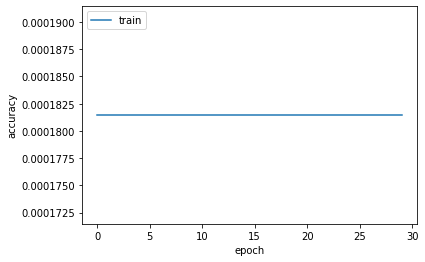

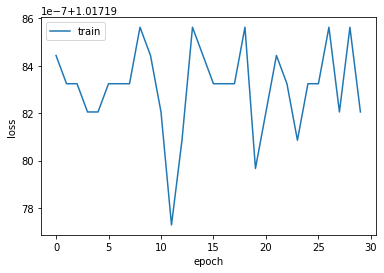

In [ ]:
def display_history(history):
    plt.plot(history.history['accuracy'])

    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])

    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

display_history(history);

###**Evaluating the Model**

It is not just enough to train a model. In order to know how good a fit the model has been for the given problem and corresponding data, we need to evaluate it. It is a good approach to always train the data on the training dataset and evaluate the same on the validation dataset.

The syntax for the same is:
`model_name.evaluate(validation_dataset)`

In [ ]:
model_evaluation = forecast_moisture_level.evaluate(soil_df_validation)

93/93 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


###Forecasting the value for the next 30 days

It is a good approach to always train the data on the training dataset and evaluate the same on the validation dataset. But the actual forecast should be done on the test dataset.

The syntax for the same is: `model_name.predict(test_dataset)`

*Note: Test data to be replaced by train data and validation data from the **Data Preparation** stage.*

(Ref:https://www.youtube.com/watch?v=UbvkhuqVqUI)

Basis the above specified we will write a code to forecast value of moisture level in soil for 30th day from the last day of the input data.

In [ ]:
forecast_for_number_of_days = 30

We need to reshape input data to make it match to the dimensions during iterations. Thus, we will have to reshape the test data here.

In [ ]:
input_dataset = soil_df_test_scaled
initial_input = list(soil_df_test_scaled)
raw_output = []
i = 0
while i < forecast_for_number_of_days:

  if (len(initial_input)>timesteps):
    input_dataset = np.array(initial_input[1:])
    input_dataset = input_dataset.reshape(1, timesteps, n_features)
    raw_result = forecast_moisture_level.predict(input_dataset, verbose= 0)
    initial_input.append(raw_result[0][0])
    initial_input = initial_input[1:]
    raw_output.append(raw_result[0][0])
    i = i + 1
  else:
    input_dataset = input_dataset.reshape(1, timesteps, n_features)
    raw_result = forecast_moisture_level.predict(initial_input, verbose=0)
    initial_input.append(raw_result[0][0])
    raw_output.append(raw_result[0][0])
    i = i + 1

print(raw_output)


ValueError: ignored

*Note: Logic for the above code explained in the appendix section.*

We can also proceed with plotting the forecasted level of moisture to give a visual sense to the prediction.

We need to inverse the normalised value to get back the actual one. To this value we are required to add back trend and seasonality to our forecasted value to get the actual figure.

*Remember we had earlier removed both and then normalised the values. To get back the trure value we will proceed exactly in the opposite manner.*

*Inversing normalised value*

In [ ]:

normalised_raw_result = soil_df_test_scaled.inverse_transform(raw_output)


*Adding back seasonality*

We take the last value as that is the value we had to predict according to the objective of this project and we will add 365th value from back to this estimated value. We are doing this because we had differenced it with 365 considering yearly seasonality.

In [ ]:

forecast_with_seasonality = normalised_raw_result[-1] + soil_df_test[-365]


*Adding back the trend*

The estimated value with seasonality added, is then added with the second last estimated value of. This is done to reverse the differencing approach we had done while removing trend from the dataset.

In [ ]:

forecast_with_trend_and_seasonality = forecast_with_seasonality + normalised_raw_result[-2]


**Final prediction** would be the one with trend and seasonality.

*Note:This computation holds good only for this case. But possible to generalise it further. Though I have tried but will not proceeding with this due to time constraints.*

In [ ]:
display("forecast of moisture level in German city of Munster as on ", soil_df_test.iloc[-1,-1], "is expected to be ", forecast_with_trend_and_seasonality, "." )

###**Saving the model**

Save the model for future reference.

`model_name.save(file_name.h5)`

A .h5 file is the format to store a machine learning model. This format stores structured data. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [ ]:
forecast_moisture_level.save("Munster_moisture_level_forecast".h5)

#Reflections

I would like to share few major insights that I was able to get as I worked on this project. I shall divide them section wise as it will facilitate a pointer to the section I speak about.

As I commenced writing the **introduction** I just had this in mind that, portable water is a natural resource which is getting scarce with time and that estimating the moisture level of soil will contribute to the global focus on water conservation.

Once I **glanced at the data**, it was obivious that observations were recoded at various timestamps each day. Resample on daily basis is what I had to do, but when and on what grounds? Needed some basics thus proceeded with EDA.

At the **EDA** stage, the background information helped a long way in understanding the data structure and contents. After checking datatypes, datashape and some basic statistical descriptives, I realised that data requires cleaning and refining to be prepared for use.

I started **cleaning the data** by changing the datatype of the "DATUM" column to datetime. Labels which are descriptive of their content are much convenient to work so I changed the label names and set the date column as index of the dataframe. This was essential as this is a time-series data model to be constructed. Based on background information certain columns were dropped, missing values and correlations checked. This is when I realised that there was a column on station_ID, a categorical values column. Maximum details were given about the dropped columns in theory. If I resampled data weekly - then my code had to follow 4 week calculation, yet not totalling to 30 days each time. Likewise, monthly resample would give me 30 / 31 day data and for the month of February 28 / 29. Things would be complicated.Finally, the data was resampled on daily basis (as we have to predict data for 30 days) with a mean aggregation (key word of "daily mean temeperature" being mentioned in background information threw light on the statisctical aggregation to be considered for resampling. Similar statistical aggregations accross features, dimension reduction yet with minimal / no loss of data impacting the objective of this project was the aim at this stage.

Though the data was cleaned but was not suitable for model building. So The next step was to **pre-process data** to make it good for our use. An analysis of the contribution of each feature to the target feature was to be done. Firstly, I checked the *correlations*. The highest positive correlation (around 67%) existed between, relative humidity and moisture level where as the othe features were negatively correlated. As an analytical tool, I proceeded with *feature selection* process. Initially, thought of using L1 and L2 regularisation techniques but finally settled with **RandomForest** for feature selection. The output obtained here showed that only one feature had an impact on the target variable, which was the target variable of "Moisture_level" itself. Based on this I decided to progress with univariate time-series forecast model.

Another thing which I had observed during data exploration was the data range. This showed that there could be **seasonal compositions** that are required to be considered. I used the **statsmodel's `seasonal_decompose()`**. The decomposed graphs for daily resampled data were too packed so I plotted a graph on monthly sample which gave me a clear picture. The **trend** showed a positive slope. In my opinion the two main factors for this could be, primarily, the dataset ends as on 31 Dec 2021 - which is winter in Munster and moisture level is high then. The other reason could be the outcome of pandemic lockdown which reduced human interface with nature for a longer period, thus, restoring ecological balance. There was also **yearly seasonality** where moisture level depleted during summer months and was at peak during winter. It is very important to make the data stationary in time-series analysis to get a more appropriate forecast value. For this, I used a `.diff(1)` to remove the trend and `.diff(365)` to remove seasonality. The NaN values were filled using "backfill" for trend and `.interpolate()` for seasonality, respectively. Though there we no significant outliers, we left them untouched - some noise in data is good. Once this was done the data was divided into ** training, validation and test data**. Care was taken to ensure that data was not shuffled so that order of time-series is maintained and that validation data replicated test data, in terms of datashape. Though this stage was attained, the statistical values showed a huge range. Keeping in mind the LSTM model's default activation to be **tanh**, the data was normalised between the range -1 to +1 but to each of the section of data seperately to avoid contamination through scaling. Now the data seemed good enough to proceed for model construction.

Now was the decision on which were the **models** that could be most apt. Initially, classical machine learning approach was on my mind so I proceeded with ARIMA. But it had too many repetative tasks so i moved on to Neural network setup.  **SimpleRNN** was studied, the pro was it was a recurrent neural network but the problem of vanishing gradient or blowing up of weights made me decline the same. Here, **LSTM** was the best approach as it had this highway to store output at each unit and also minimalising the cons of SimpleRNN. A little bit of data preparation had to be done prior to building a model and hyperparameters were also set. Also I did try the Functional API but as keras was consistently adding a default parameter "None" from the input and / embedding layer to LSTM layer, continues error made me change my mind on using **Sequential API** archietecture. Model was compiled usingmean_squared_error as loss function and softmax for activation. The training of model was done on train dataset, evaluated on validation dataset and `.predict(test_dataset)` was done using test dataset. A python code was written to forecast value of moisture level for 30 days from the last input date, the output was `.inverse_transform()` to get back the original value to which seasonality was added by using the last 365th value. Then trend was also added back by adding the previous value than that of the forecasted value.

Once the prediction was done we proceed **saving the model** for future reference or use.






#Conclusions and Recommendations

Portable water, an essential natural resource is becoming increasingly scarce with time. Topics such as resource (here water) management are difficult areas with implications for sustainability, maintaining ecological balance and climate change. In addition, managing this resource is costly requiring the use of numerous hardware tools and creating and encouraging public awareness for water conservation. At the same time we are experiencing cropland continuously expanding due to growth in population and simultaneously affecting nature and acquisition of forest land. I bring this into picture as trees are a medium of soil conservation and moisture maintenance in soil and atmosphere.

A little to add from personal experience is that working on this project helped build my cognitive and logical skills apart from developing interest in me to improve on statistical knowledge. Being an Indian - where we are an agrarian economy country, and having an agri-based business experience I would say the aim of the project to forecast moisture level of soil has been of great interest. If I can say, back in India appropriate irrigation methods such as sprinkle irrigation and drip irrigation and the importance of scheduled irrgation has been brought to the knowledge of farmers as a measure to help them improve crop yield - in terms of both quantity and quality, yet resulting in more sustainable water consumption. This project has given me an insight into how I could leverage the machine learning and neural network knowledge in the area of agriculture and geography. LSTMs have been a great neural networking method for time series and predictive analysis.

My recommendation to my own work would be to improve the same using a multi-variate approach. As we have studied in our schooling, the subject of Geography, we are aware that many factors do influnece the moisture level in soil. These may include, temperature, humidity, moisture retention rate of soil, the soil quality itself, the geographic location and climatic conditions of the loaction, pollution in atmosphere, etc. I am sure methods like Exponential smoothing, ARIMA, RandomForest, etc   neural networks like RNN or LSTM can be used in anaylsing and forecasting values for most of the above mentioned influencers. Thus enabling in the contribution of reducing the impact of global warming, maintaining ecological balance, etc. In short preserving our planet for future generations.




#References

- Introduction
1. https://www.indiaagronet.com/indiaagronet/water_management/water_3.htm


- Exploratory Data Analysis (EDA)
1. https://www.datacamp.com/community/tutorials/python-data-profiling?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1007633&gclid=CjwKCAjwur-SBhB6EiwA5sKtjjI6c4o8kYtFnRM-Mz03cRKDtjNYMuVlP8eQYtF0-WxpIc3DGKFxVhoC1SIQAvD_BwE

- Data Pre-processing
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame (used multiple sub sections available on this page)


- Feature engineering and feature selection
1.	https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea
2.	http://file.biolab.si/textbooks/ml1/feature-selection.pdf
3.	https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10
4.	https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
5.	https://visualstudiomagazine.com/articles/2017/12/05/neural-network-regularization.aspx
6.	https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
7.	https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/
8.	https://machinelearningmastery.com/random-forest-ensemble-in-python/
9.	https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
10.	https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
11.	https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
-	Data Pre-processing
1.	https://colab.research.google.com/drive/16RDjy8_vjZZxS4S3DjTpefAE1YszzQJh#scrollTo=MBFUHYGDZuwQ
2.	https://colab.research.google.com/drive/16RDjy8_vjZZxS4S3DjTpefAE1YszzQJh#scrollTo=MBFUHYGDZuwQ
3.	https://www.geeksforgeeks.org/what-is-a-trend-in-time-series/#:~:text=Trend%20is%20a%20pattern%20in,disappears%2C%20it%20does%20not%20repeat
4.	https://machinelearningmastery.com/time-series-trends-in-python/
5.	https://www.investopedia.com/terms/d/detrend.asp
6.	https://www.statisticshowto.com/residual-plot/
7.	https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
8.	https://colab.research.google.com/drive/1yKe1GPDcld3n_ing8mxlclsP00I61Lkf#scrollTo=xEwTQaDFcUnc
9.	https://ayc-data.com/data_science/2020/04/19/electricity-forecasting-with-data-science.html
10.	https://colab.research.google.com/drive/16RDjy8_vjZZxS4S3DjTpefAE1YszzQJh#scrollTo=MBFUHYGDZuwQ
11.	https://colab.research.google.com/drive/16RDjy8_vjZZxS4S3DjTpefAE1YszzQJh#scrollTo=MBFUHYGDZuwQ
12.	https://colab.research.google.com/drive/1DHimbI87BU-LNS8ee3hPeCn3vLmw5uw2#scrollTo=ok_llRypceo6
13.	https://towardsdatascience.com/dont-use-k-fold-validation-for-time-series-forecasting-30b724aaea64
14.	https://towardsdatascience.com/predictive-analysis-rnn-lstm-and-gru-to-predict-water-consumption-e6bb3c2b4b02
15. https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/
16. https://www.youtube.com/watch?v=H6du_pfuznE


-	Models
-	ARIMA
1.	https://colab.research.google.com/drive/16RDjy8_vjZZxS4S3DjTpefAE1YszzQJh#scrollTo=eWSm9WCSZuwW
2.	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
3.	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
4.	https://medium.com/analytics-vidhya/in-depth-tutorial-of-recurrent-neural-network-rnn-and-long-short-term-memory-lstm-networks-3a782712a09f
-	Recurrent Neural Network (RNN) Model
1.	https://medium.com/analytics-vidhya/in-depth-tutorial-of-recurrent-neural-network-rnn-and-long-short-term-memory-lstm-networks-3a782712a09f
2.	https://www.tensorflow.org/guide/keras/rnn
3.	https://keras.io/api/layers/recurrent_layers/simple_rnn/
-	Long Short Term Memory (LSTM) Model
1.	https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/
2.	https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a#:~:text=Deep%20Neural%20Network%3F-,What%20are%20hyperparameters%3F,optimizing%20the%20weights%20and%20bias
3.	https://colab.research.google.com/drive/1wVPdLfo_ue9MYSMnZpuIO6gk_2BWGHzh#scrollTo=R8IYutdnW_SG
4.	https://www.quora.com/How-does-one-determine-the-optimal-number-of-units-and-other-settings-for-an-LSTM-neural-network-layer-other-than-trial-and-error
5.	https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
6.	https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
7.	https://www.analyticsvidhya.com/blog/2021/06/time-series-analysis-recurrence-neural-network-in-python/
8.	https://www.youtube.com/watch?v=UbvkhuqVqUI
9.	https://colab.research.google.com/drive/1uK9Dp4p3rMDj1cbUfZ9BwEFpGrjB9M5U#scrollTo=WjUxKUkpcw7p
10.	https://www.analyticsvidhya.com/blog/2021/06/time-series-analysis-recurrence-neural-network-in-python/
11.	https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
12.	https://keras.io/api/layers/recurrent_layers/lstm/
13.	https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f
14.	https://moodle.ibs-b.hu/mod/url/view.php?id=25400
15.	https://colab.research.google.com/drive/1uK9Dp4p3rMDj1cbUfZ9BwEFpGrjB9M5U#scrollTo=Wfe4YRnexJl2
16.	https://keras.io/api/callbacks/
17.	https://colab.research.google.com/drive/1uK9Dp4p3rMDj1cbUfZ9BwEFpGrjB9M5U#scrollTo=C0U1lp9XcTxg
18.	https://www.youtube.com/watch?v=UbvkhuqVqUI
19. https://www.youtube.com/watch?v=H6du_pfuznE



#Appendix
**1. Logic to division of data into dependent and independent variable for the purpose of forecasting.** (Ref: Data Preparation under LSTM Model)

def prepare_data(dataset, timesteps):

  input_series = [] - creating input list to be filled

  output_list = [] - creating output list to be filled

  for i in range(len(dataset)-timesteps-1 ): - iteration through the len of dataset minus (timesteps-1) as if no next value it will through error

  input_data = dataset[i:(i+timesteps), 0] - this is done to have the value of the iteration index element as first element

  - from the above line we are gathering input and output into their respective variables

  input_series.append(input_data) - appending list with their respective data

  output_list.append(dataset[i + timesteps, 0]) - appending list with starting from element which indexes from iteration element + timesteps

  return np.array(input_series), np.array(output_list)


**2. Logic to the code to get the forecast value.** (Ref: Forecasting the value for the next 30 days - LSTM Model)

input_dataset = soil_df_test_scaled - we will use normalised test_data for actual prediction

initial_input = list(soil_df_test_scaled) - we convert the test_data into a list

raw_output = [] - an empty list created to be filled with forecasted values

i = 0 - first iteration for while loop should begin from 0

while i < forecast_for_number_of_days: - iteration goes on until this this threshold is reached, here target of 30 day forecast

  if (len(initial_input)>timesteps): - if the number of samples of initial_input is more than timesteps

  input_dataset = np.array(initial_input[1:]) - convert the input_dataset into a numpy array from the value of second index until the end

  input_dataset = input_dataset.reshape(1, timesteps, n_features) - reshape it. We specify 1 because we have one value in each iteration

  raw_result = forecast_moisture_level.predict(input_dataset, verbose= 0) - we proceed with predicting calling the .predict on test dataset

  initial_input.append(raw_result[0][0]) - appending the initial input list with the result of prediction at every iteration

  initial_input = initial_input[1:] - this is done to skip the previous value

  raw_output.append(raw_result[0][0]) - appending output_list with prediction at every iteration

  i = i + 1 - increase the value of i to go on to the next iteration

  else:

  input_dataset = input_dataset.reshape(1, timesteps, n_features) - reshape input_dataset. We specify 1 because we have one value in each iteration

  raw_result = forecast_moisture_level.predict(initial_input, verbose=0) - we proceed with predicting calling the .predict on test dataset

  initial_input.append(raw_result[0][0]) - appending the initial input list with the result of prediction at every iteration

  raw_output.append(raw_result[0][0]) - appending output_list with prediction at every iteration

  i = i + 1 - increase the value of i to go on to the next iteration

print(raw_output) - printing the output list


